# Topic 1: Exercise 1

#### Importing the data

In [2]:
library(dplyr)
library(stringr)
library(PerformanceAnalytics)
library(foreach)
library(ggplot2)
library(reshape2)

In [3]:
d <- read.csv('../../datasets/Colleges.csv')

In [4]:
head(d)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


## 1- Identify the type of all variables

In [5]:
foreach (col = d, nms = colnames(d)) %do% {
    print(str_interp("${nms} is of type ${typeof(col)}"))
}

[1] "X is of type character"
[1] "Private is of type character"
[1] "Apps is of type double"
[1] "Accept is of type double"
[1] "Enroll is of type double"
[1] "Top10perc is of type double"
[1] "Top25perc is of type double"
[1] "F.Undergrad is of type double"
[1] "P.Undergrad is of type double"
[1] "Outstate is of type double"
[1] "Room.Board is of type double"
[1] "Books is of type double"
[1] "Personal is of type double"
[1] "PhD is of type double"
[1] "Terminal is of type double"
[1] "S.F.Ratio is of type double"
[1] "perc.alumni is of type double"
[1] "Expend is of type double"
[1] "Grad.Rate is of type integer"


[[1]]
[1] "X is of type character"

[[2]]
[1] "Private is of type character"

[[3]]
[1] "Apps is of type double"

[[4]]
[1] "Accept is of type double"

[[5]]
[1] "Enroll is of type double"

[[6]]
[1] "Top10perc is of type double"

[[7]]
[1] "Top25perc is of type double"

[[8]]
[1] "F.Undergrad is of type double"

[[9]]
[1] "P.Undergrad is of type double"

[[10]]
[1] "Outstate is of type double"

[[11]]
[1] "Room.Board is of type double"

[[12]]
[1] "Books is of type double"

[[13]]
[1] "Personal is of type double"

[[14]]
[1] "PhD is of type double"

[[15]]
[1] "Terminal is of type double"

[[16]]
[1] "S.F.Ratio is of type double"

[[17]]
[1] "perc.alumni is of type double"

[[18]]
[1] "Expend is of type double"

[[19]]
[1] "Grad.Rate is of type integer"

#### represented as R type - numerical/categorical 

- X is of type character - categorical (id)
- Private is of type character - categorical binary
- Apps is of type integer - numerical discrete
- Accept is of type integer - numerical discrete
- Enroll is of type integer - numerical discrete
- Top10perc is of type integer - numerical discrete
- Top25perc is of type integer - numerical discrete
- F.Undergrad is of type integer - numerical discrete
- P.Undergrad is of type integer - numerical discrete
- Outstate is of type integer - numerical discrete
- Room.Board is of type integer - numerical discrete
- Books is of type integer - numerical discrete
- Personal is of type integer - numerical discrete
- PhD is of type integer - numerical discrete
- Terminal is of type integer - numerical discrete
- S.F.Ratio is of type double - numerical continuous
- perc.alumni is of type integer - numerical discrete
- Expend is of type integer - numerical discrete
- Grad.Rate is of type integer - numerical discrete

## 2- Perform a visual analysis of each quantitative variable. Then do so considering the variable *private*. Describe each plot.

### Histograms

In [6]:
# setting plot sizes
options(repr.plot.width = 14, repr.plot.height = 8)

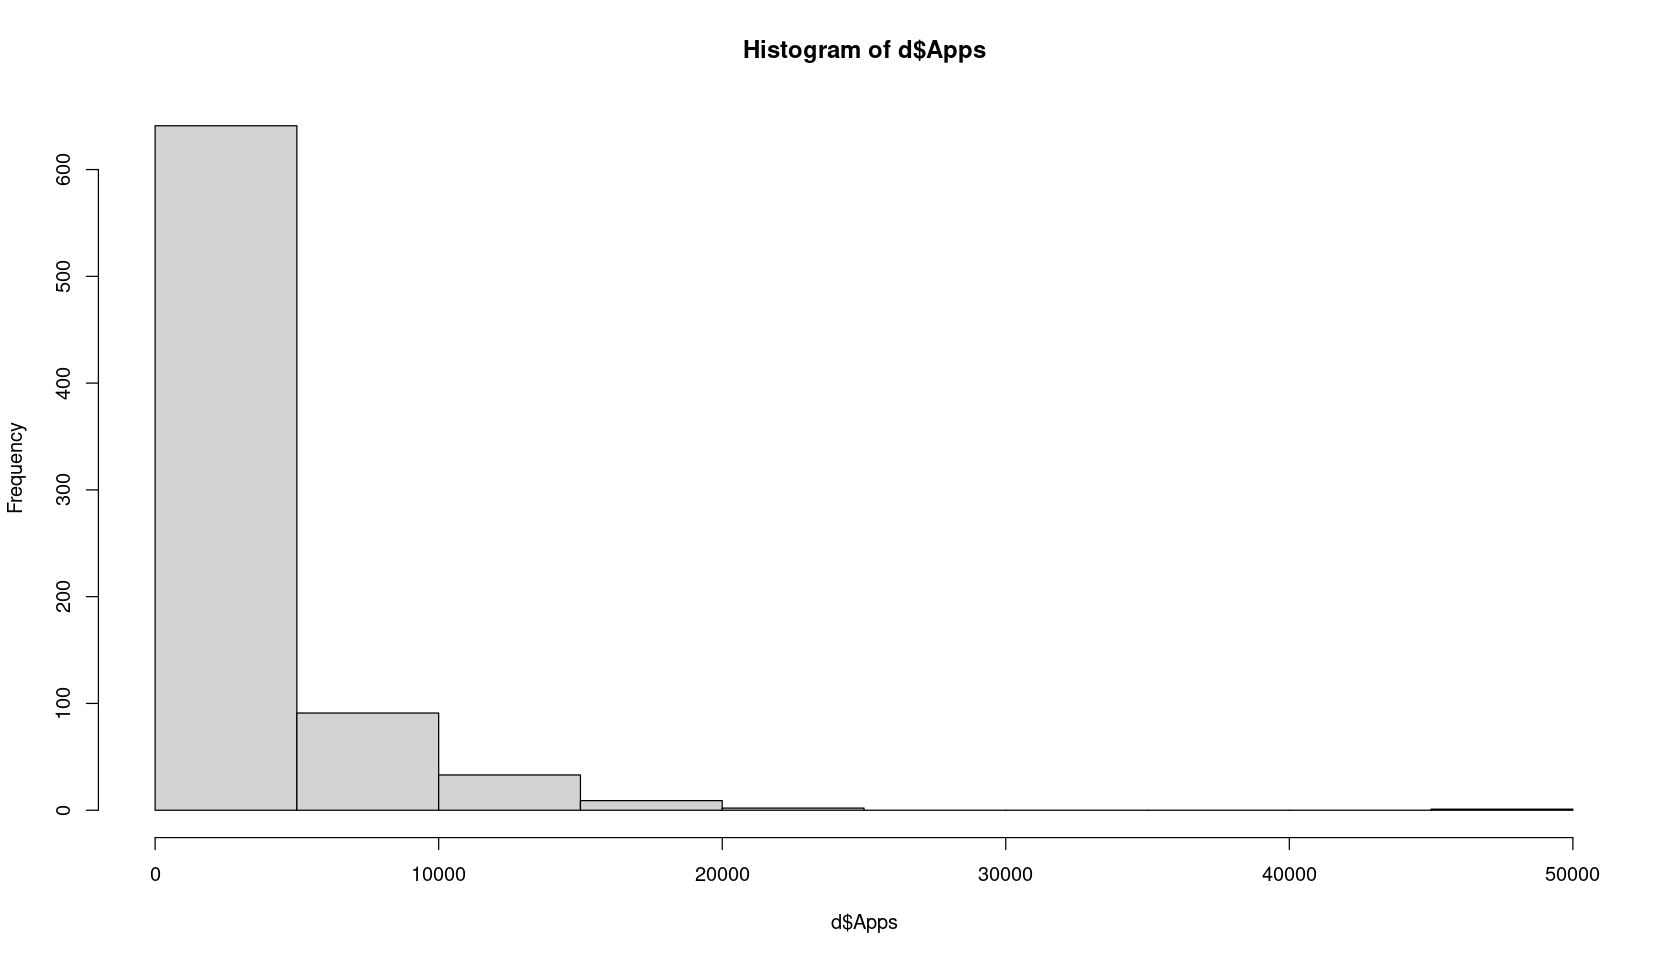

In [7]:
# Apps
hist(d$Apps)

- Large right tail, higher frequency
- Long left tail
- Significantly more elements in the right tail
- Resembles gamma distribution

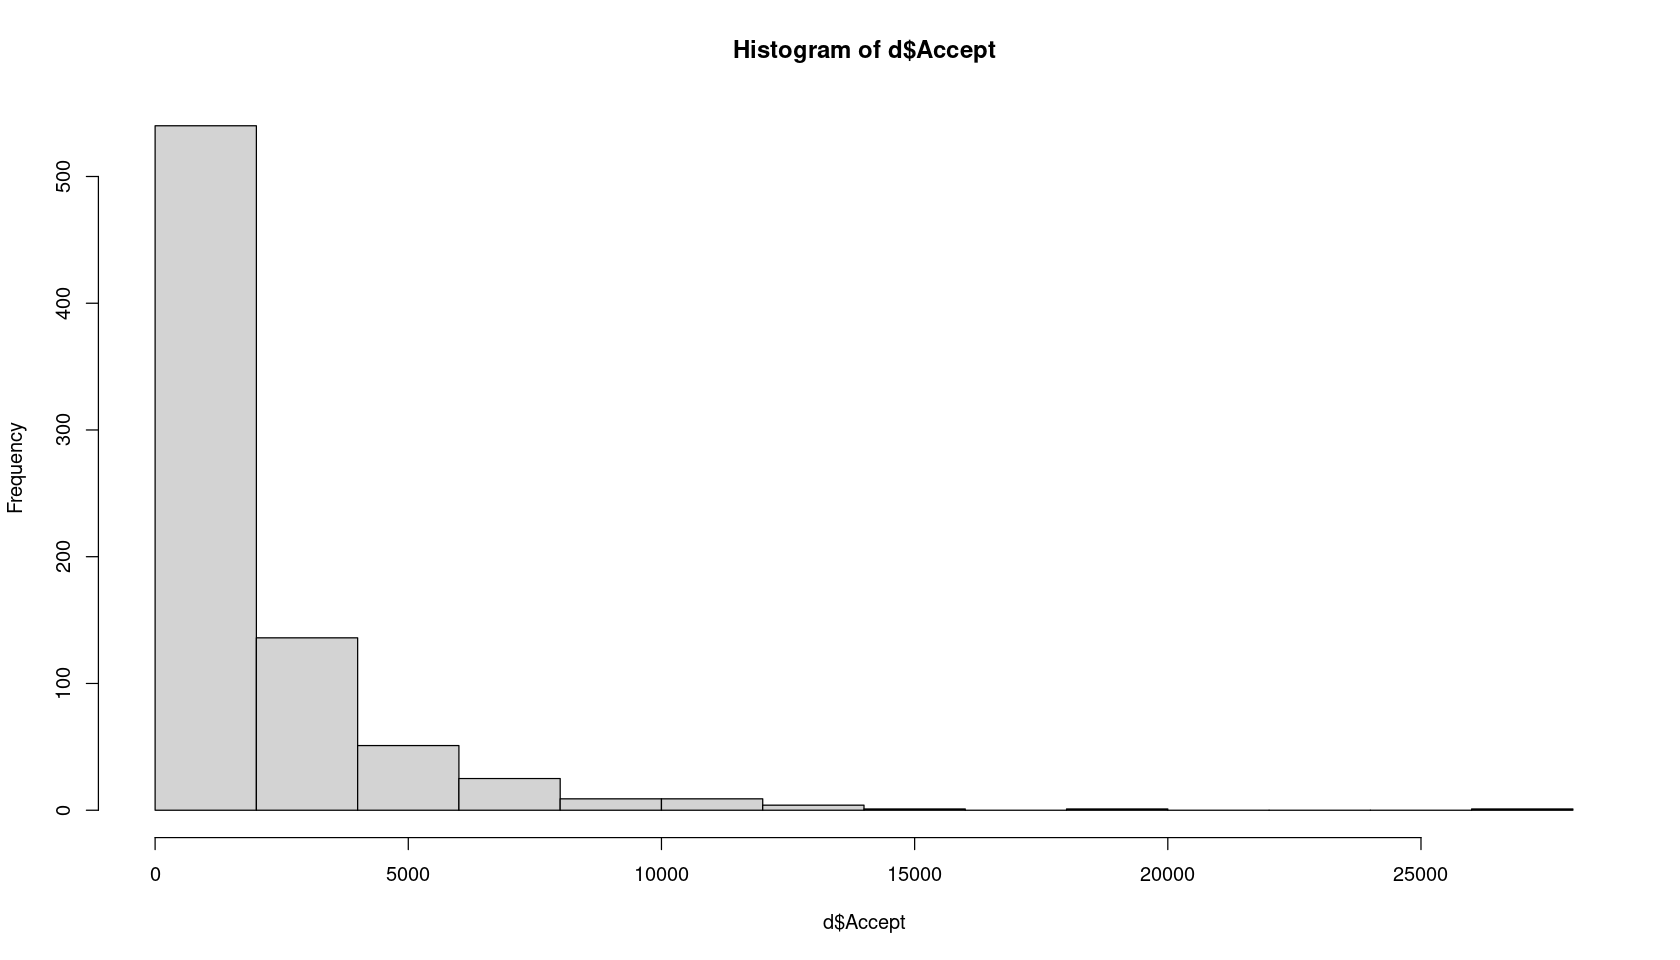

In [8]:
# Accept
hist(d$Accept)

Pretty much the same as Apps but with a significantly shorter left tail. Probably because those students being accepted are just a subset of those that apply.

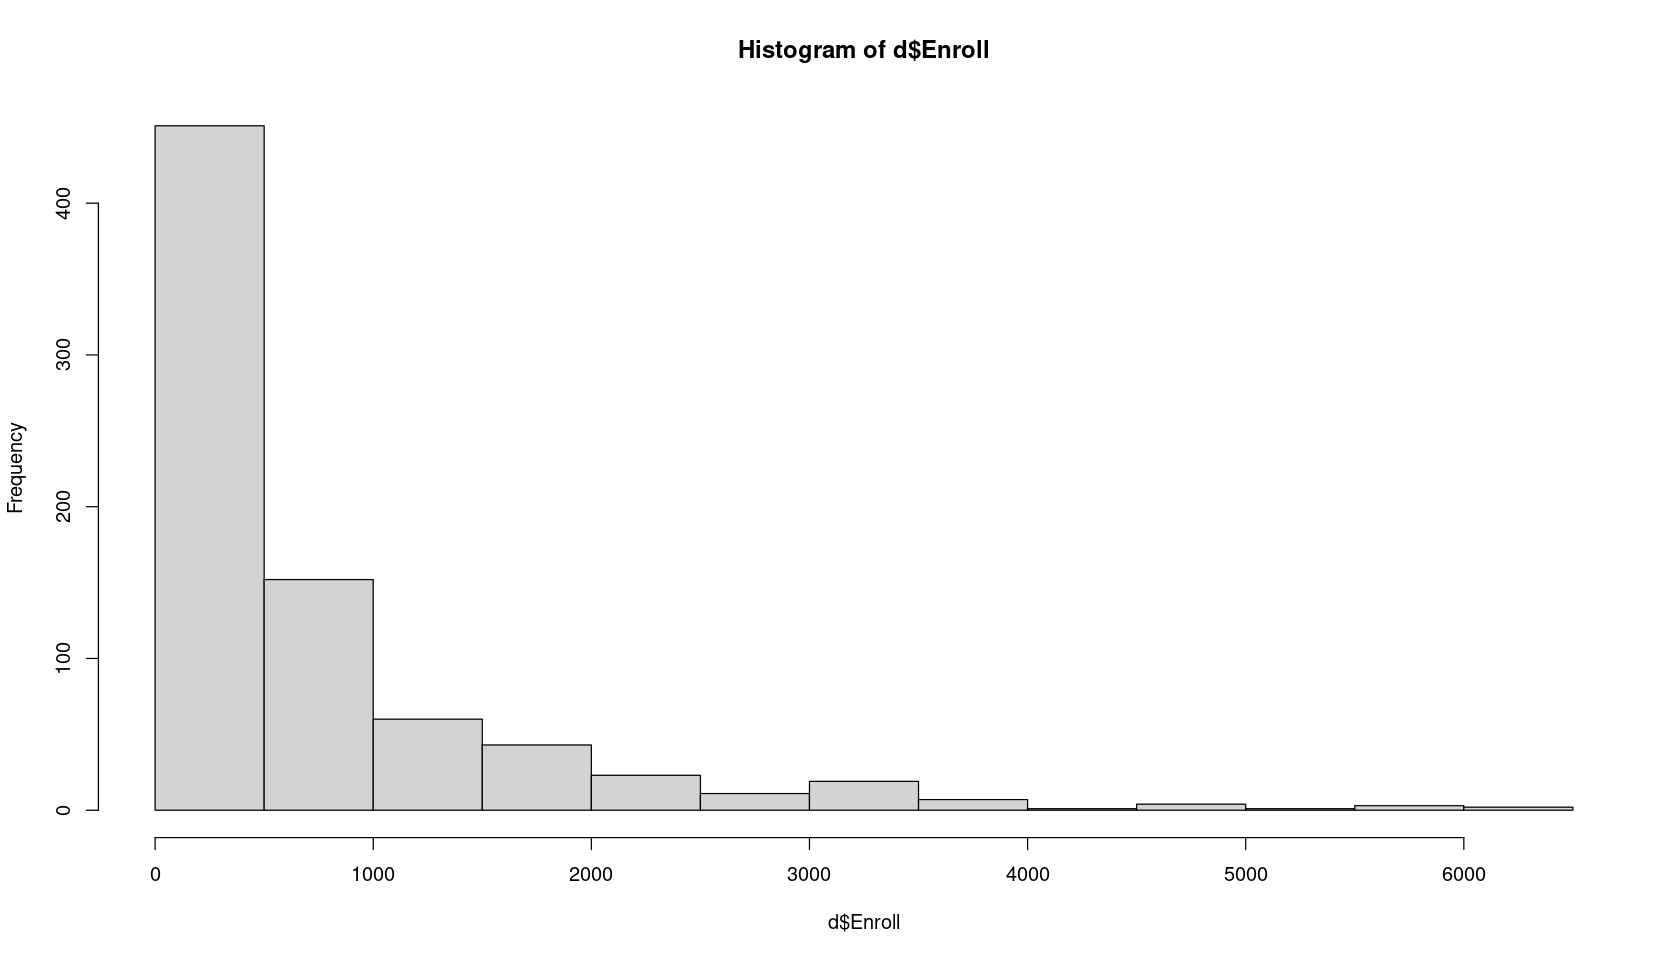

In [9]:
# Enroll
hist(d$Enroll)

Enroll also tells the same story, but in this case our left tail is even smaller than the accept left tail. Maybe because significantly less students enroll than those that just get accepted

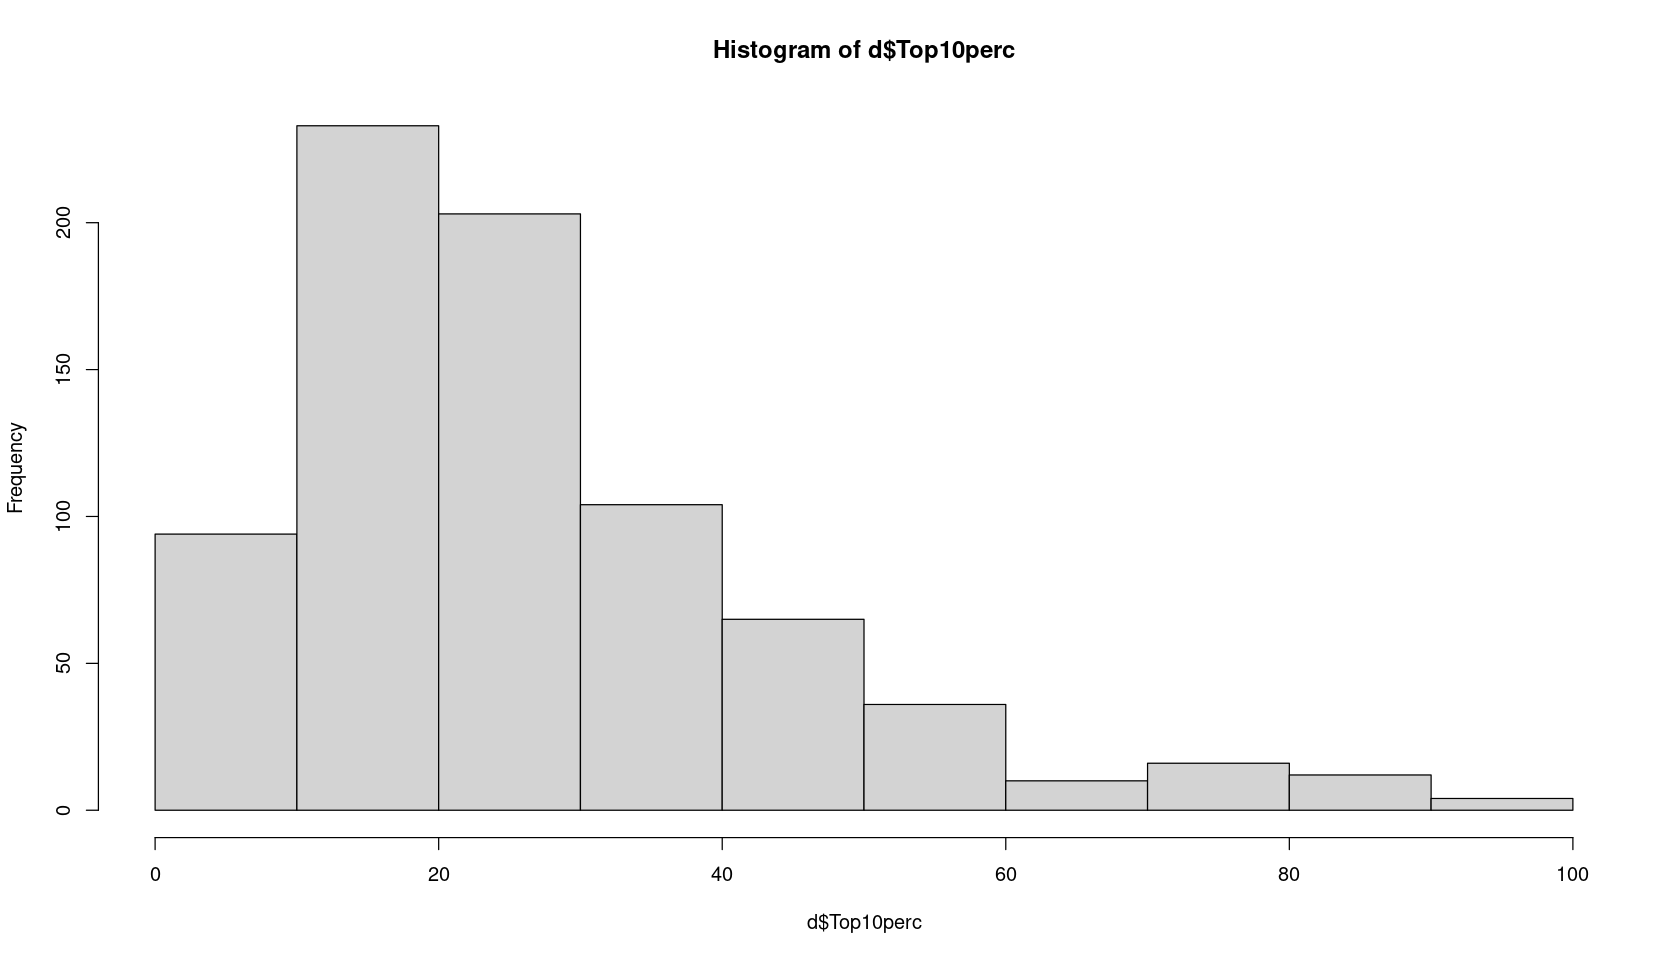

In [10]:
# Top10perc
hist(d$Top10perc)

- long left tail
- short but high frequency right tail
- Resembles gaussian distribution
- most elements concentrate around 20

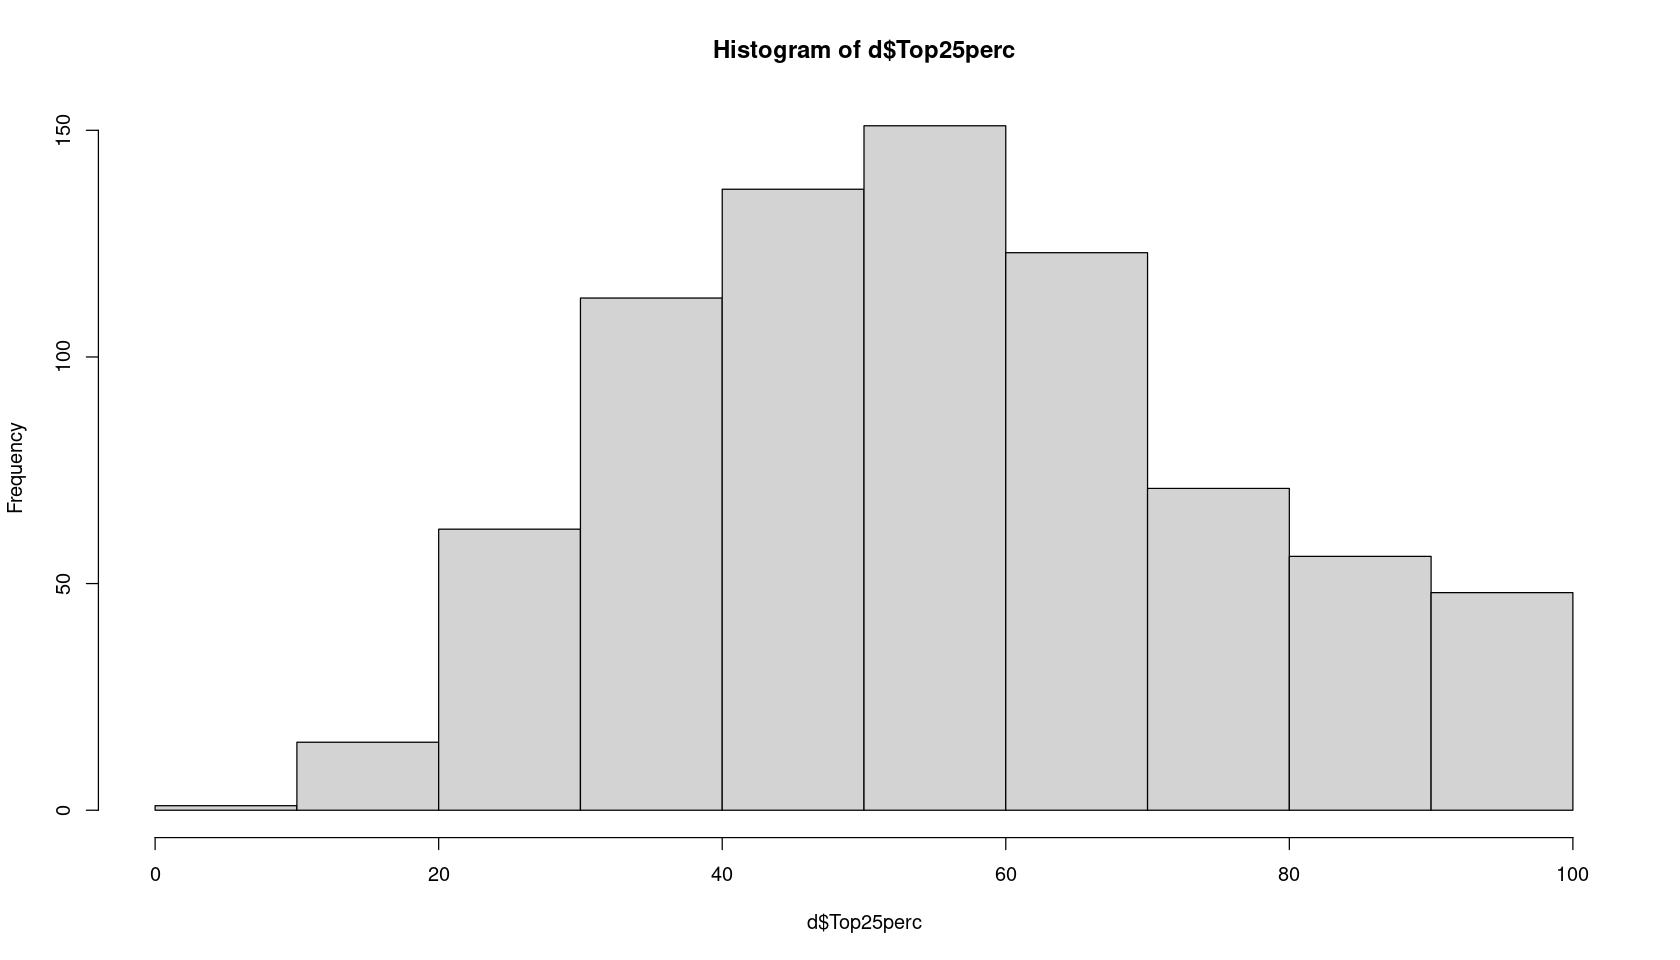

In [11]:
# Top25perc
hist(d$Top25perc)

- mean is probably between 40-60
- small right tail
- large left tail
- Resembles gaussian distribution

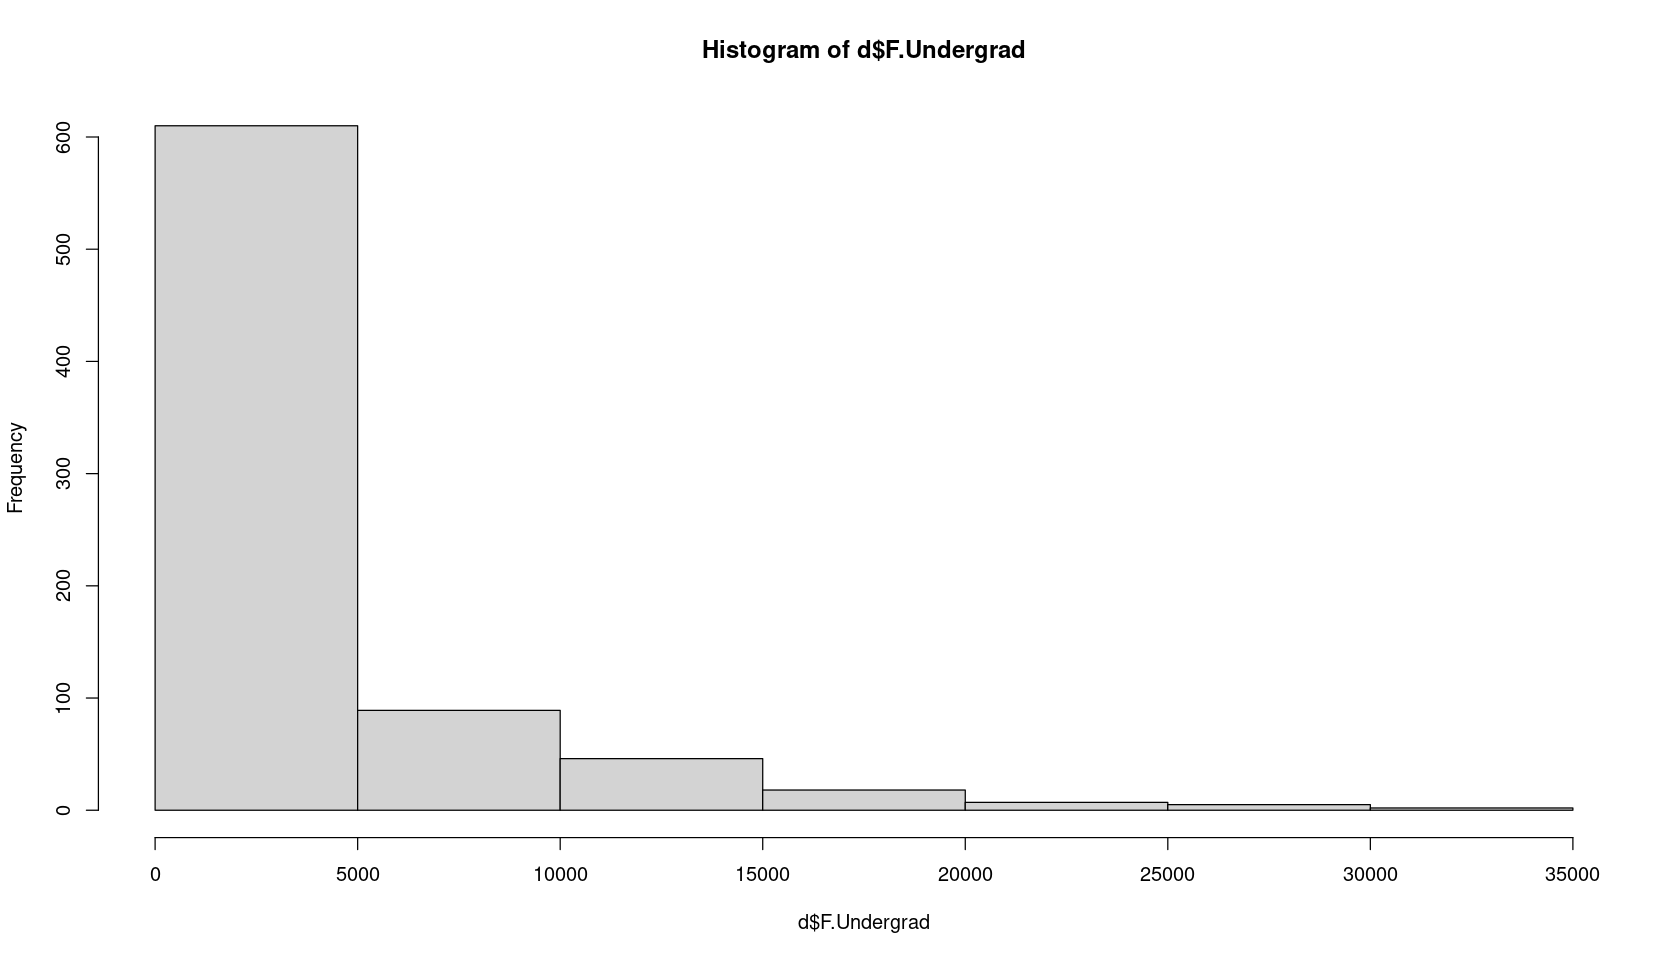

In [12]:
# F.Undergrad
hist(d$F.Undergrad)

- long left tail
- most of the universities between 0-5000
- significantly less data at 5000+
- Resembles gamma distribution

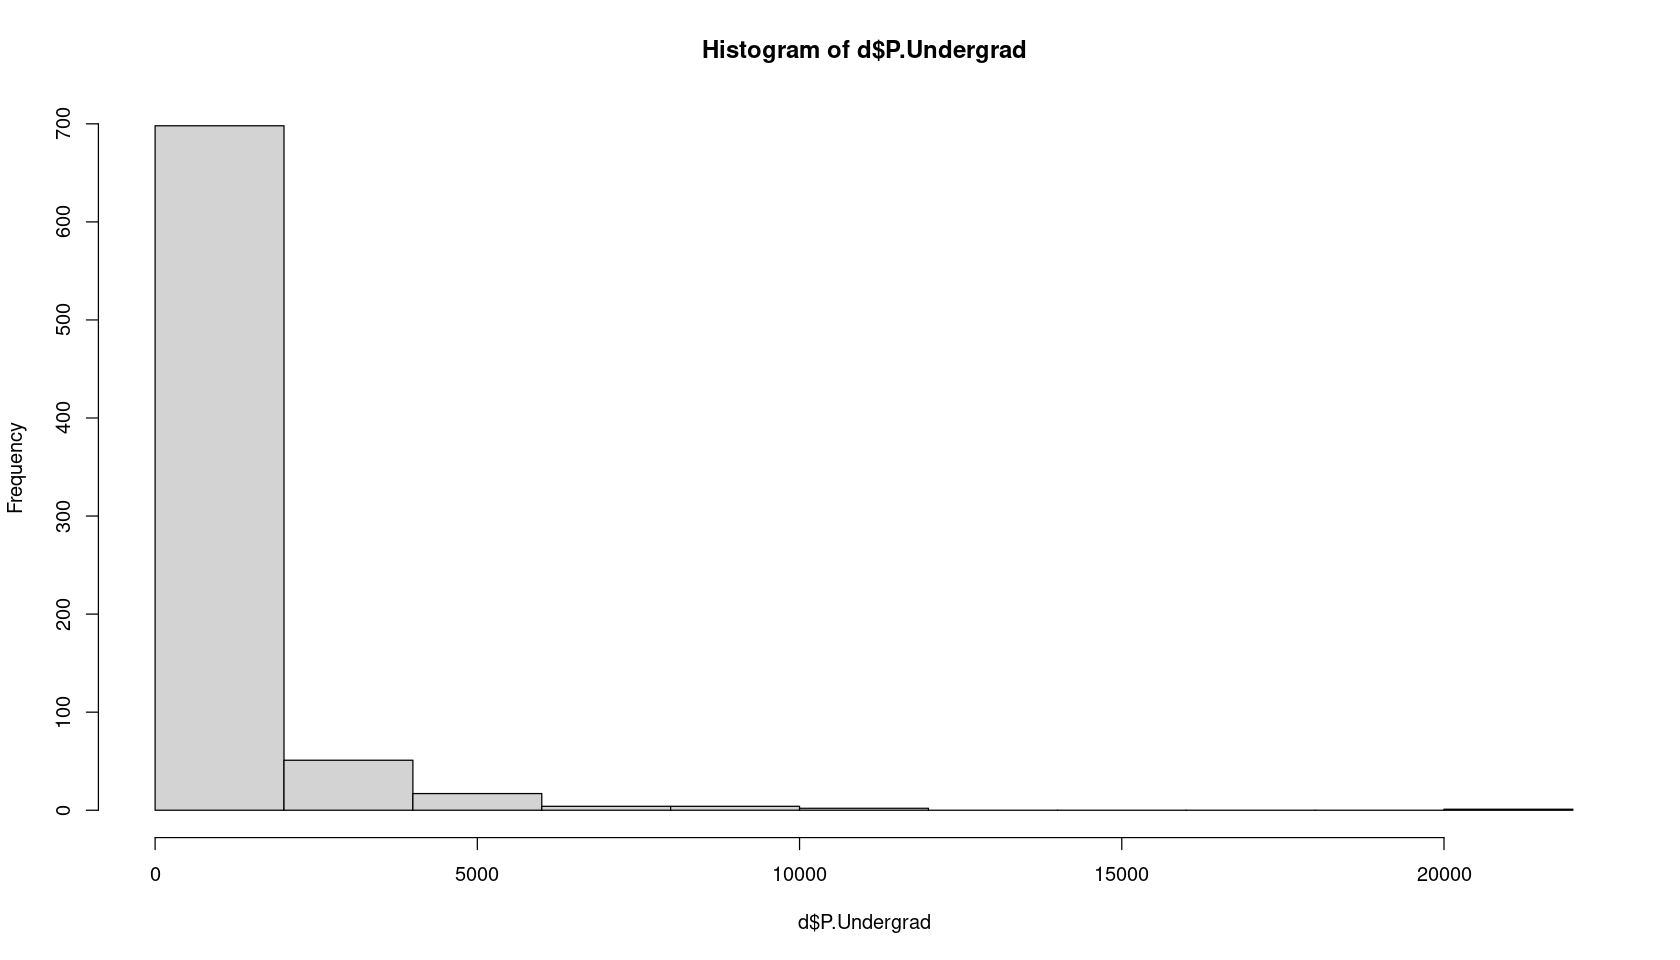

In [13]:
# P.Undergrad
hist(d$P.Undergrad)

Similar to F.Undergrad we have a quite long right tail, this one resembles Apps more, and similar to F.Undergrad we also have a large frequency right tail and possibly more than 90% of the data between 0 and 5000

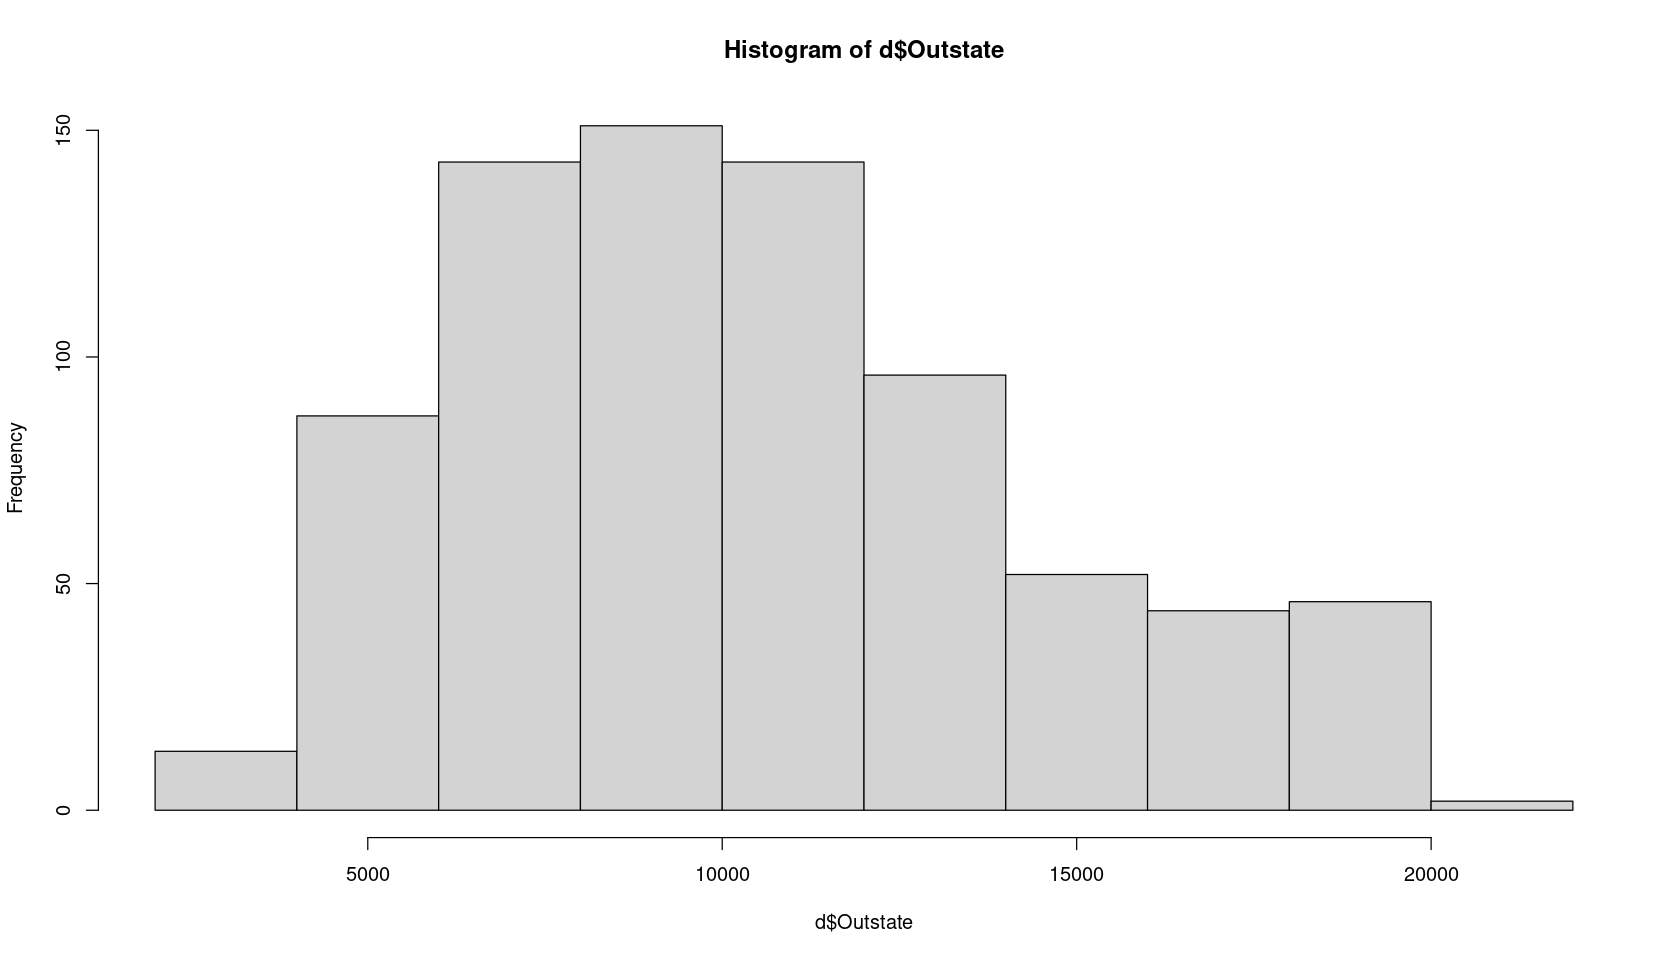

In [14]:
# Outstate
hist(d$Outstate)

- Mean around 10000
- relatively heavy left tail but not very long
- light right tail
- resembles gaussian distribution

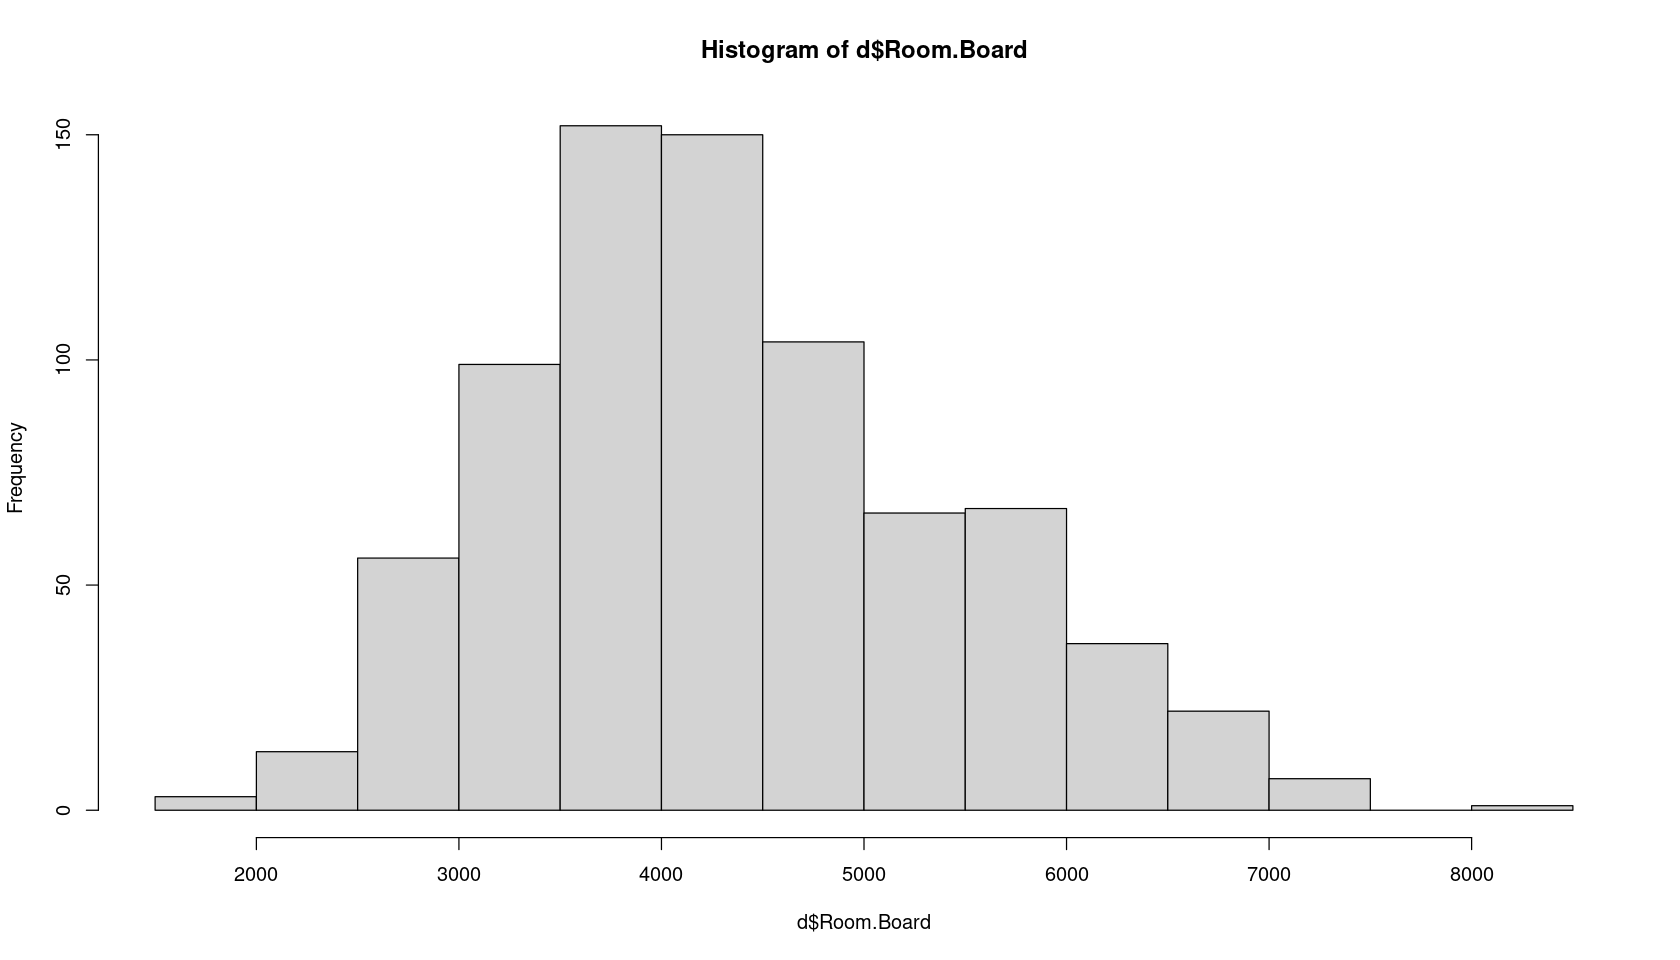

In [15]:
# Room.Board
hist(d$Room.Board)

- resembles a slightly right skewed gaussian distribution
- relatively long left tail
- mean between 3500-4500

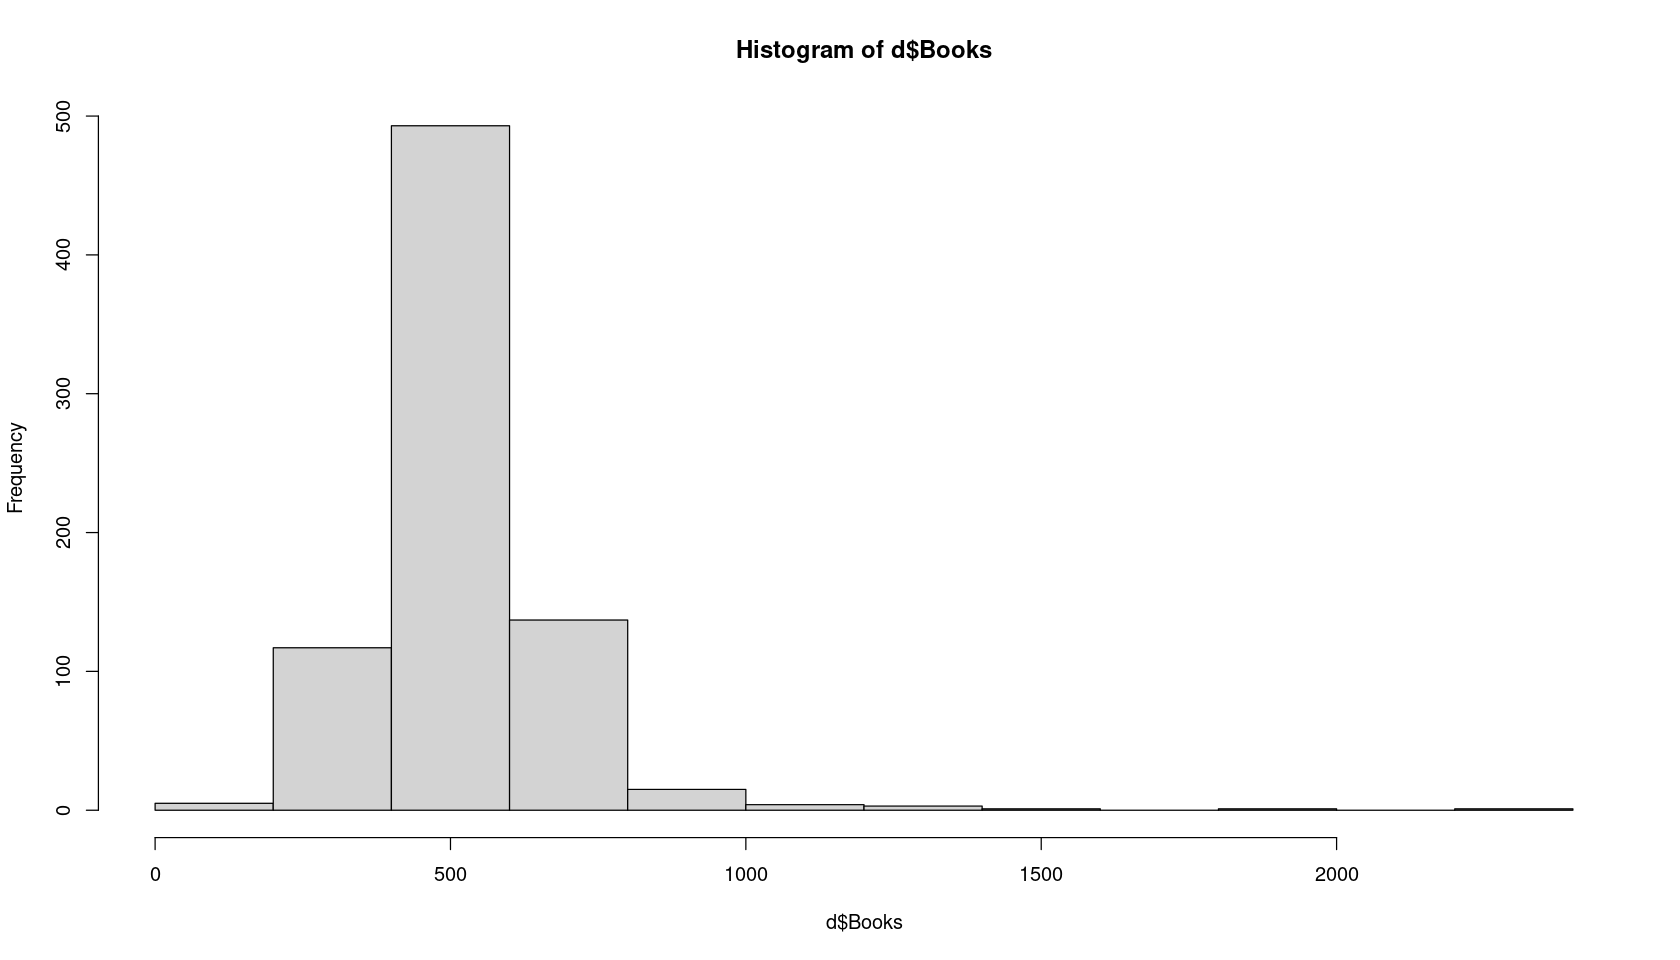

In [16]:
# Books
hist(d$Books)

- long left tail
- very right skewed
- mean most probably around 500
- nearly all values between 400-750

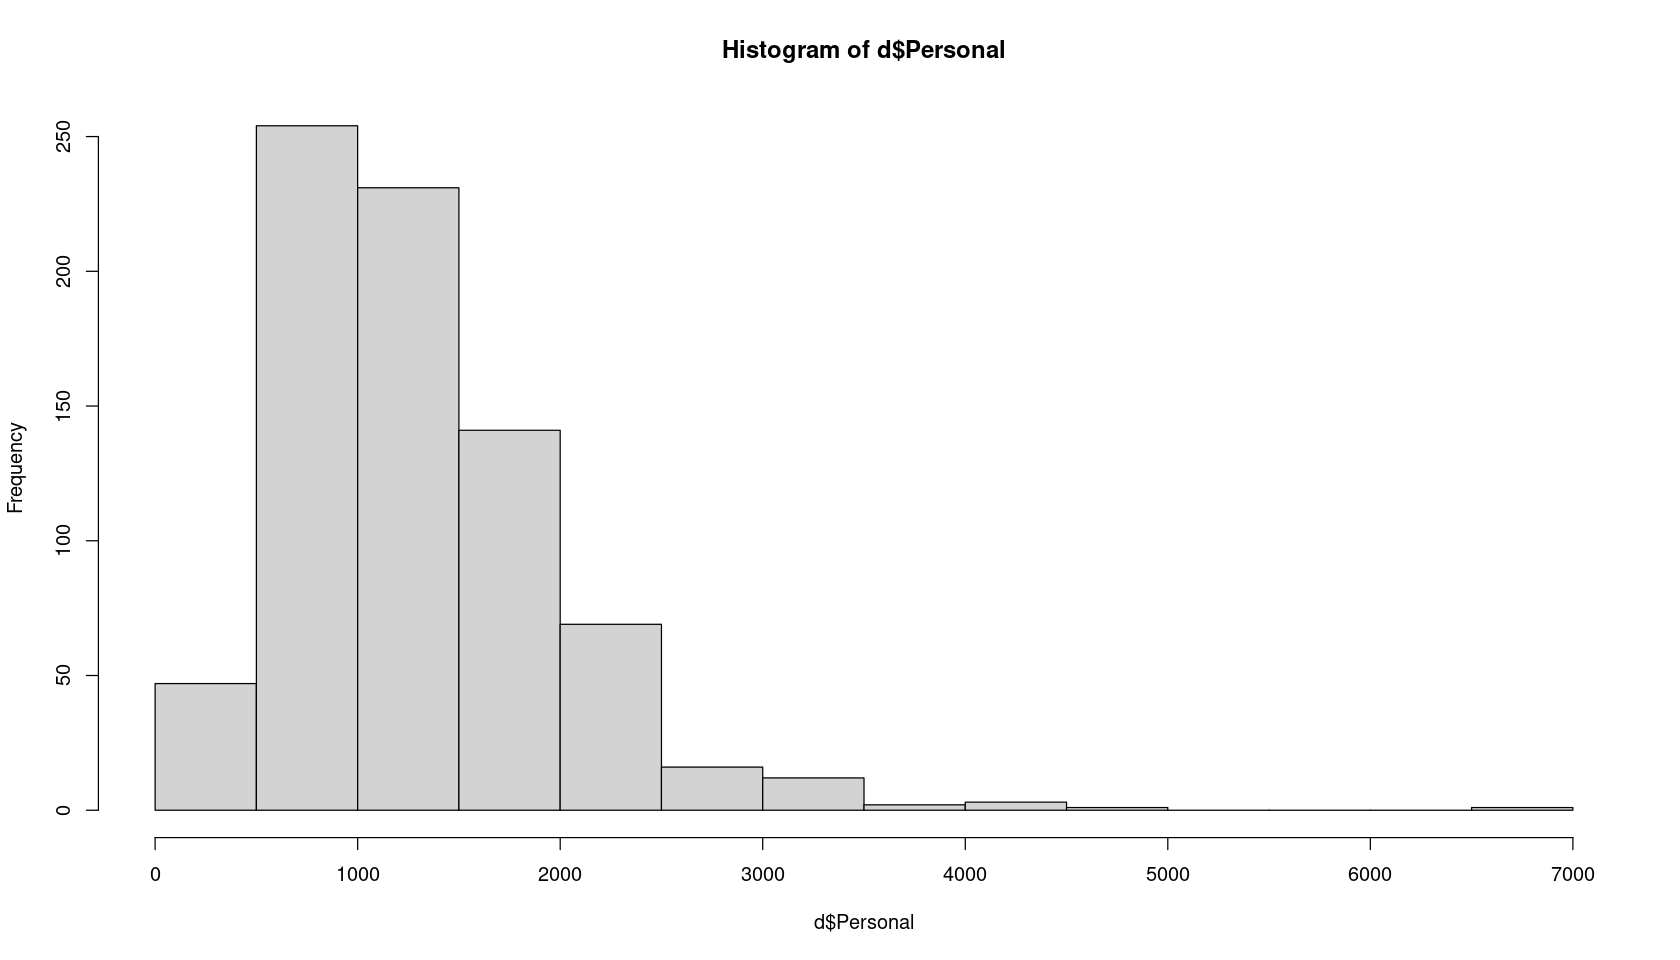

In [17]:
# Personal
hist(d$Personal)

- very right skewed
- long left tail
- resembles a gamma distribution

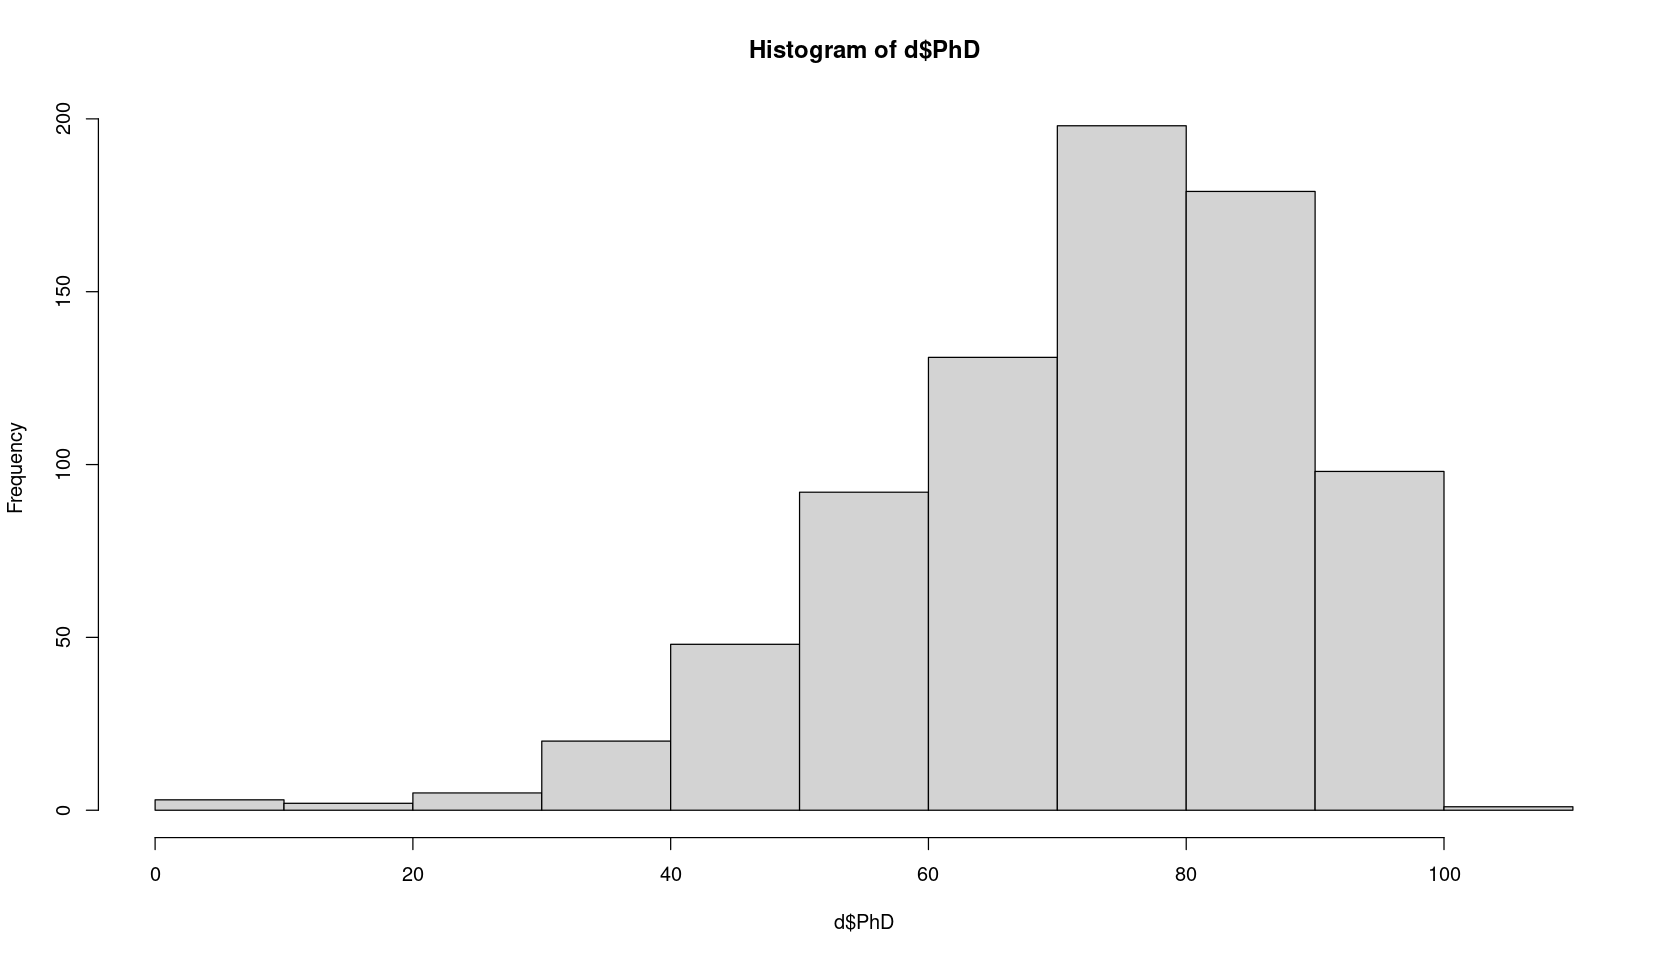

In [18]:
# PhD
hist(d$PhD)

- long and light right tail
- very left skewed

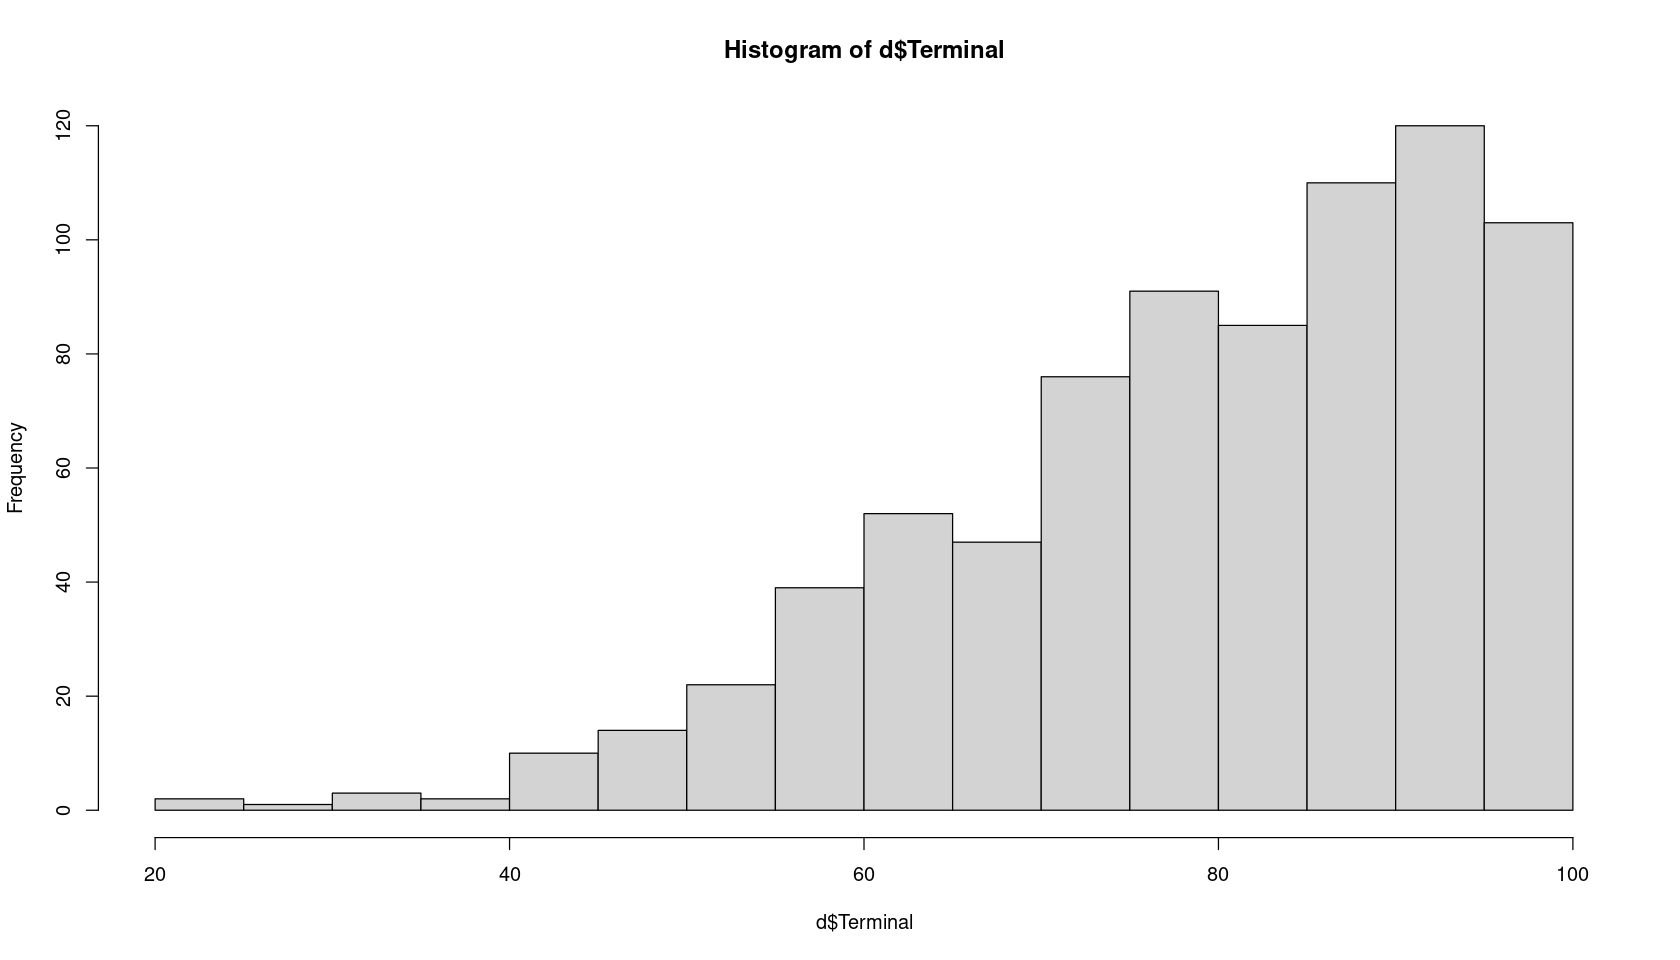

In [19]:
# Terminal
hist(d$Terminal)

- very left skewed
- light and long right tail
- frequency increases with value (the higher the more common perhaps?)

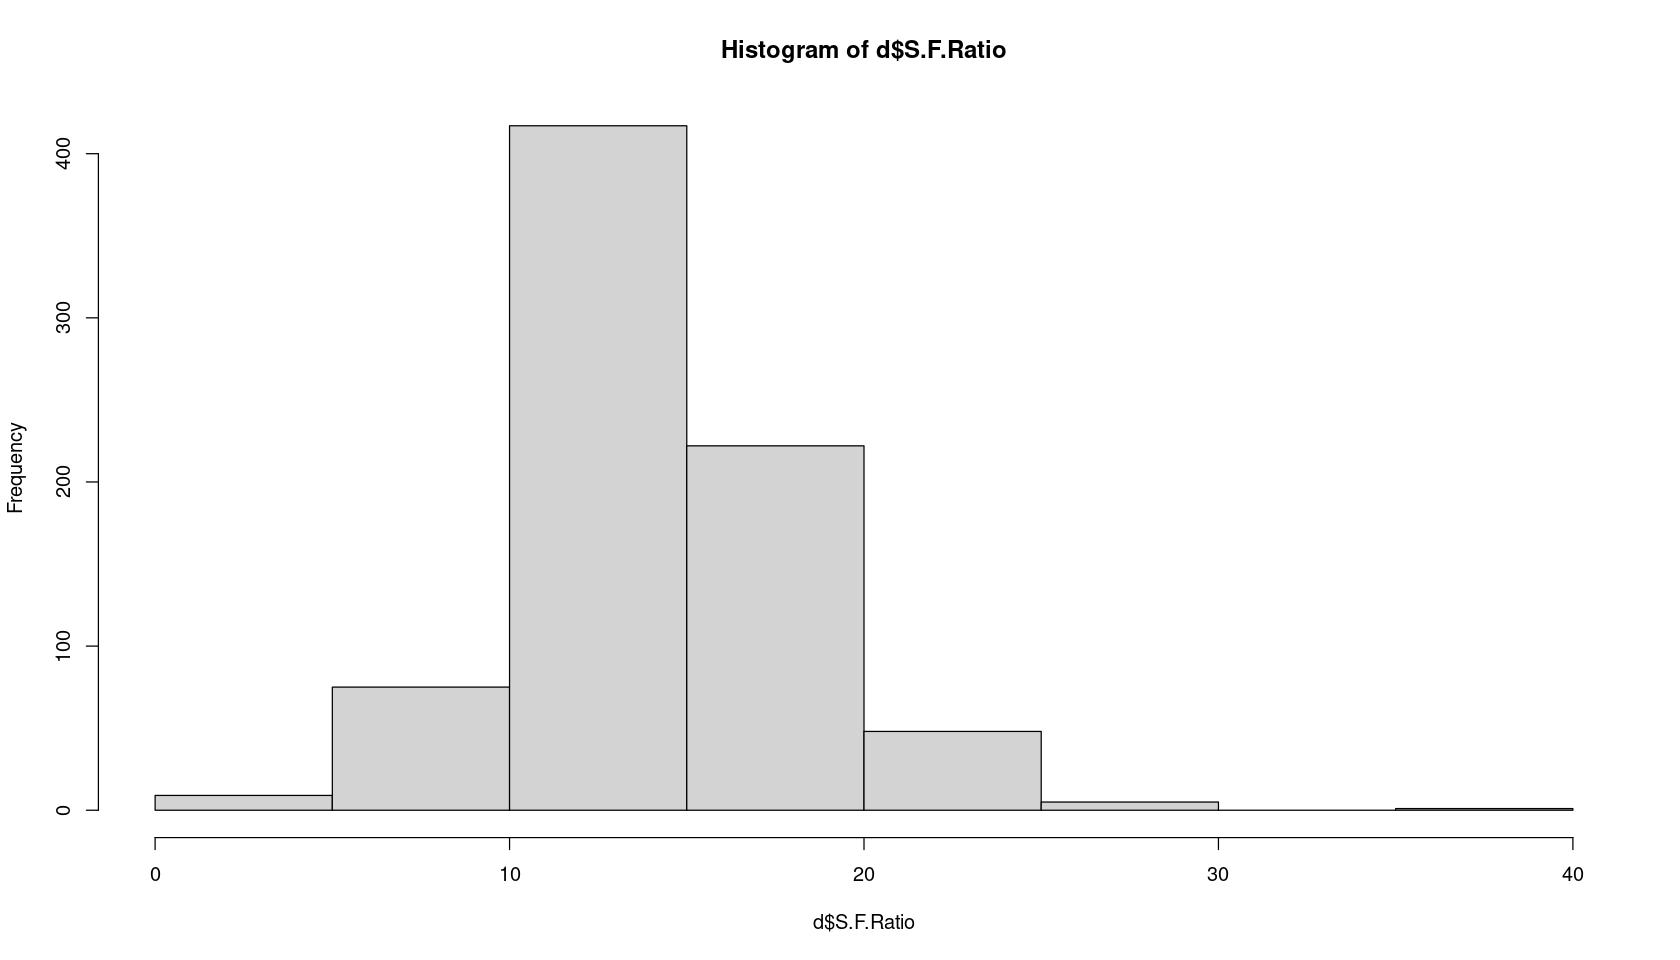

In [20]:
# S.F.Ratio
hist(d$S.F.Ratio)

- most values between 10-20
- light and long left tail
- light right tail
- resembles gaussian distribution

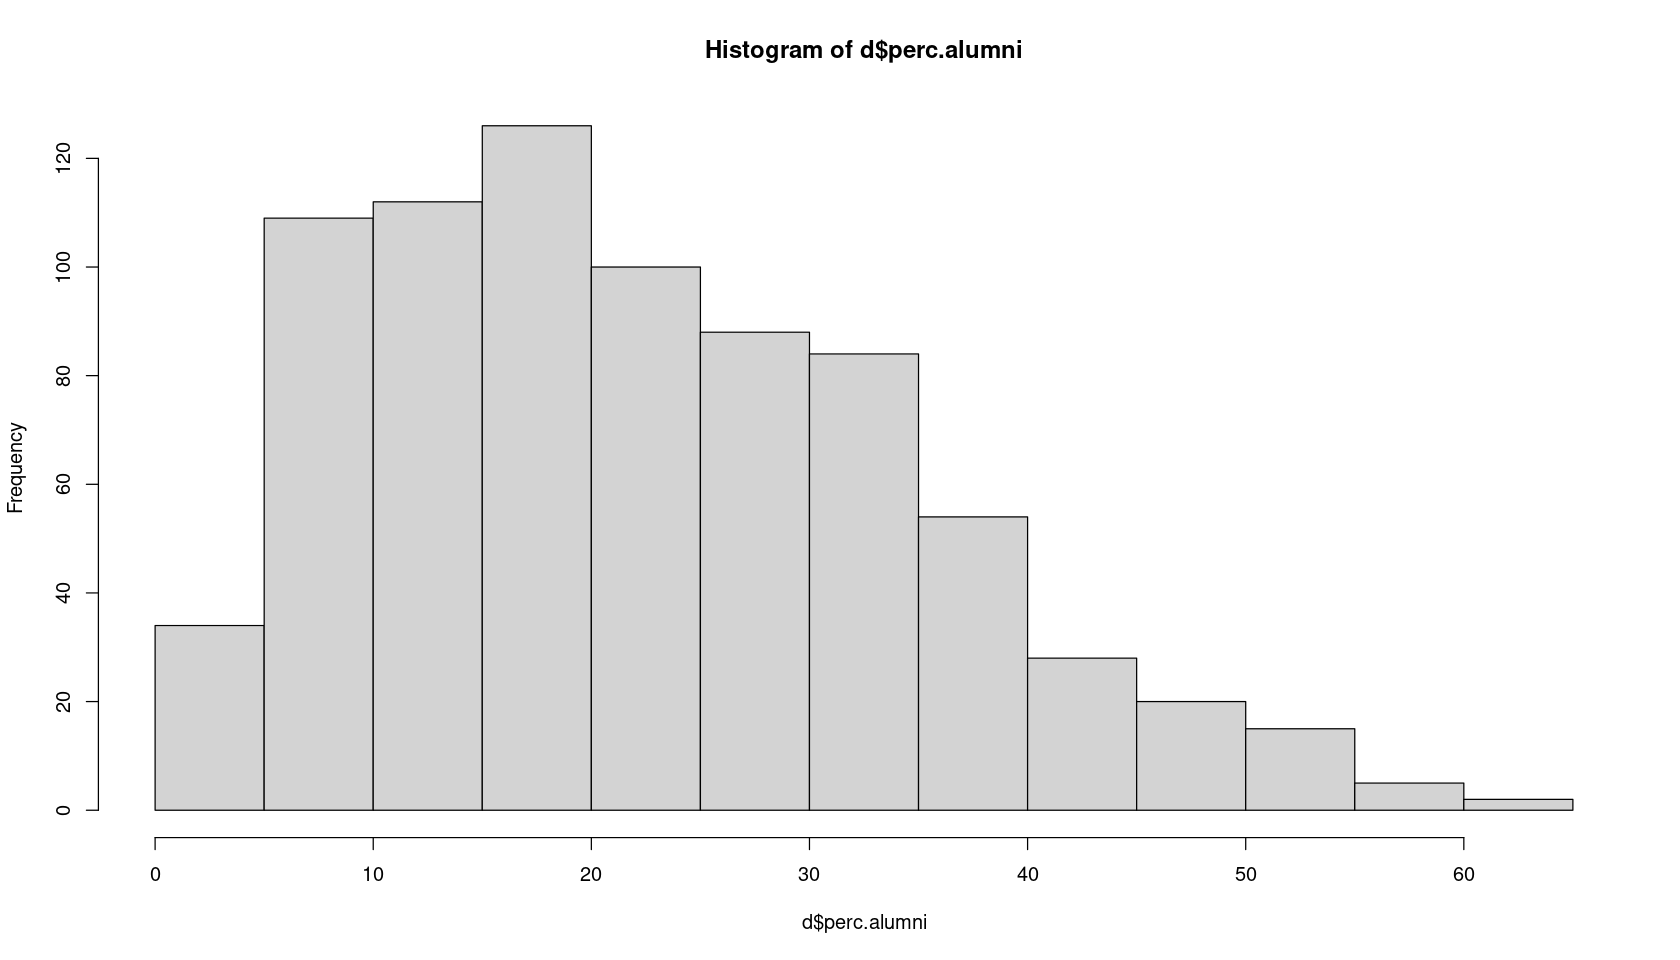

In [21]:











# perc.alumni
hist(d$perc.alumni)

- right skewed
- long and light left tail
- relatively flat around the highest frequency part

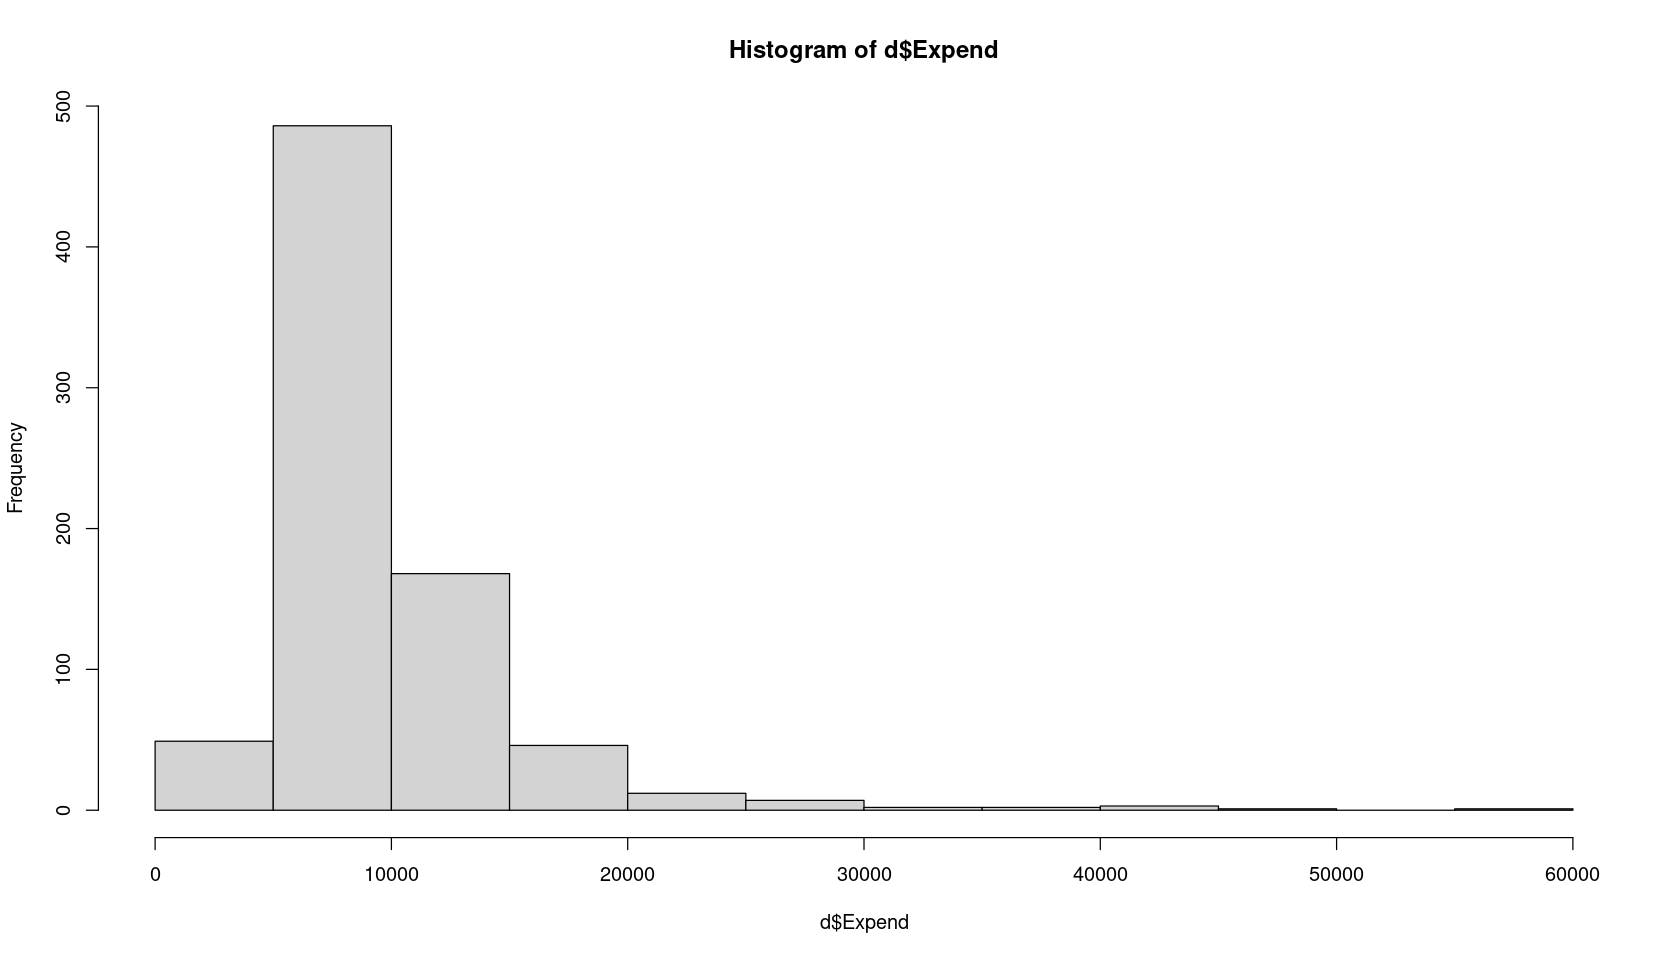

In [22]:
# Expend
hist(d$Expend)

- very right skewed
- very long left tail
- most values around 10000
- resembles gamma distribution

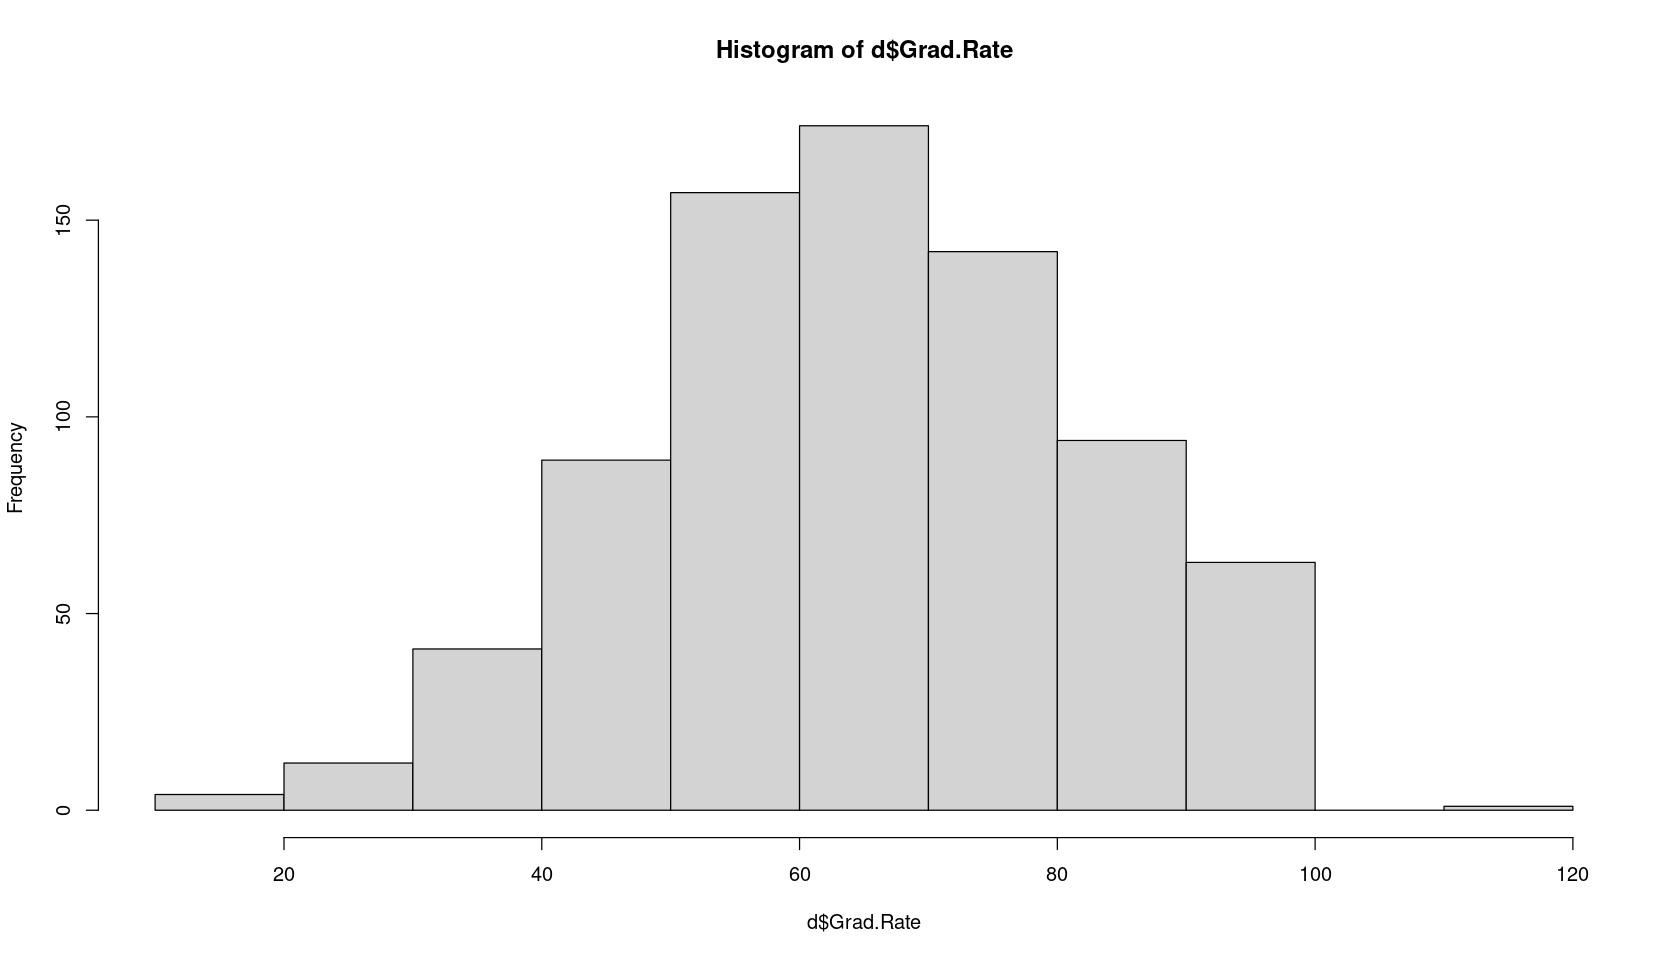

In [23]:
# Grad.Rate
hist(d$Grad.Rate)

- quite resembles a gaussian distribution with mean between 50-70
- light leftmost bin frequency

### Boxplots

In [24]:
# setting plot sizes
options(repr.plot.width = 18, repr.plot.height = 10)

In [25]:
# numeric columns
cols = colnames(d)[colnames(d) != 'X' & colnames(d) != 'Private']

# maximum per column
sapply(select(d,cols), max, na.rm = TRUE)

# low val cols
low_val_c = c('Top10perc','Top25perc','PhD','Terminal','S.F.Ratio','perc.alumni','Grad.Rate')
low_val = melt(d, id.vars='X', measure.vars=low_val_c)

# med val cols
med_val_c = c('Enroll','Room.Board','Books','Personal')
med_val = melt(d, id.vars='X', measure.vars=med_val_c)

# high val cols
high_val_c = c('Apps','Accept','F.Undergrad','P.Undergrad','Outstate','Expend')
high_val = melt(d, id.vars='X', measure.vars=high_val_c)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(cols)` instead of `cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



Apps      Accept      Enroll   Top10perc   Top25perc F.Undergrad 
    48094.0     26330.0      6392.0        96.0       100.0     31643.0 
P.Undergrad    Outstate  Room.Board       Books    Personal         PhD 
    21836.0     21700.0      8124.0      2340.0      6800.0       103.0 
   Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
      100.0        39.8        64.0     56233.0       118.0

#### Variables with low values (maximum under 120)

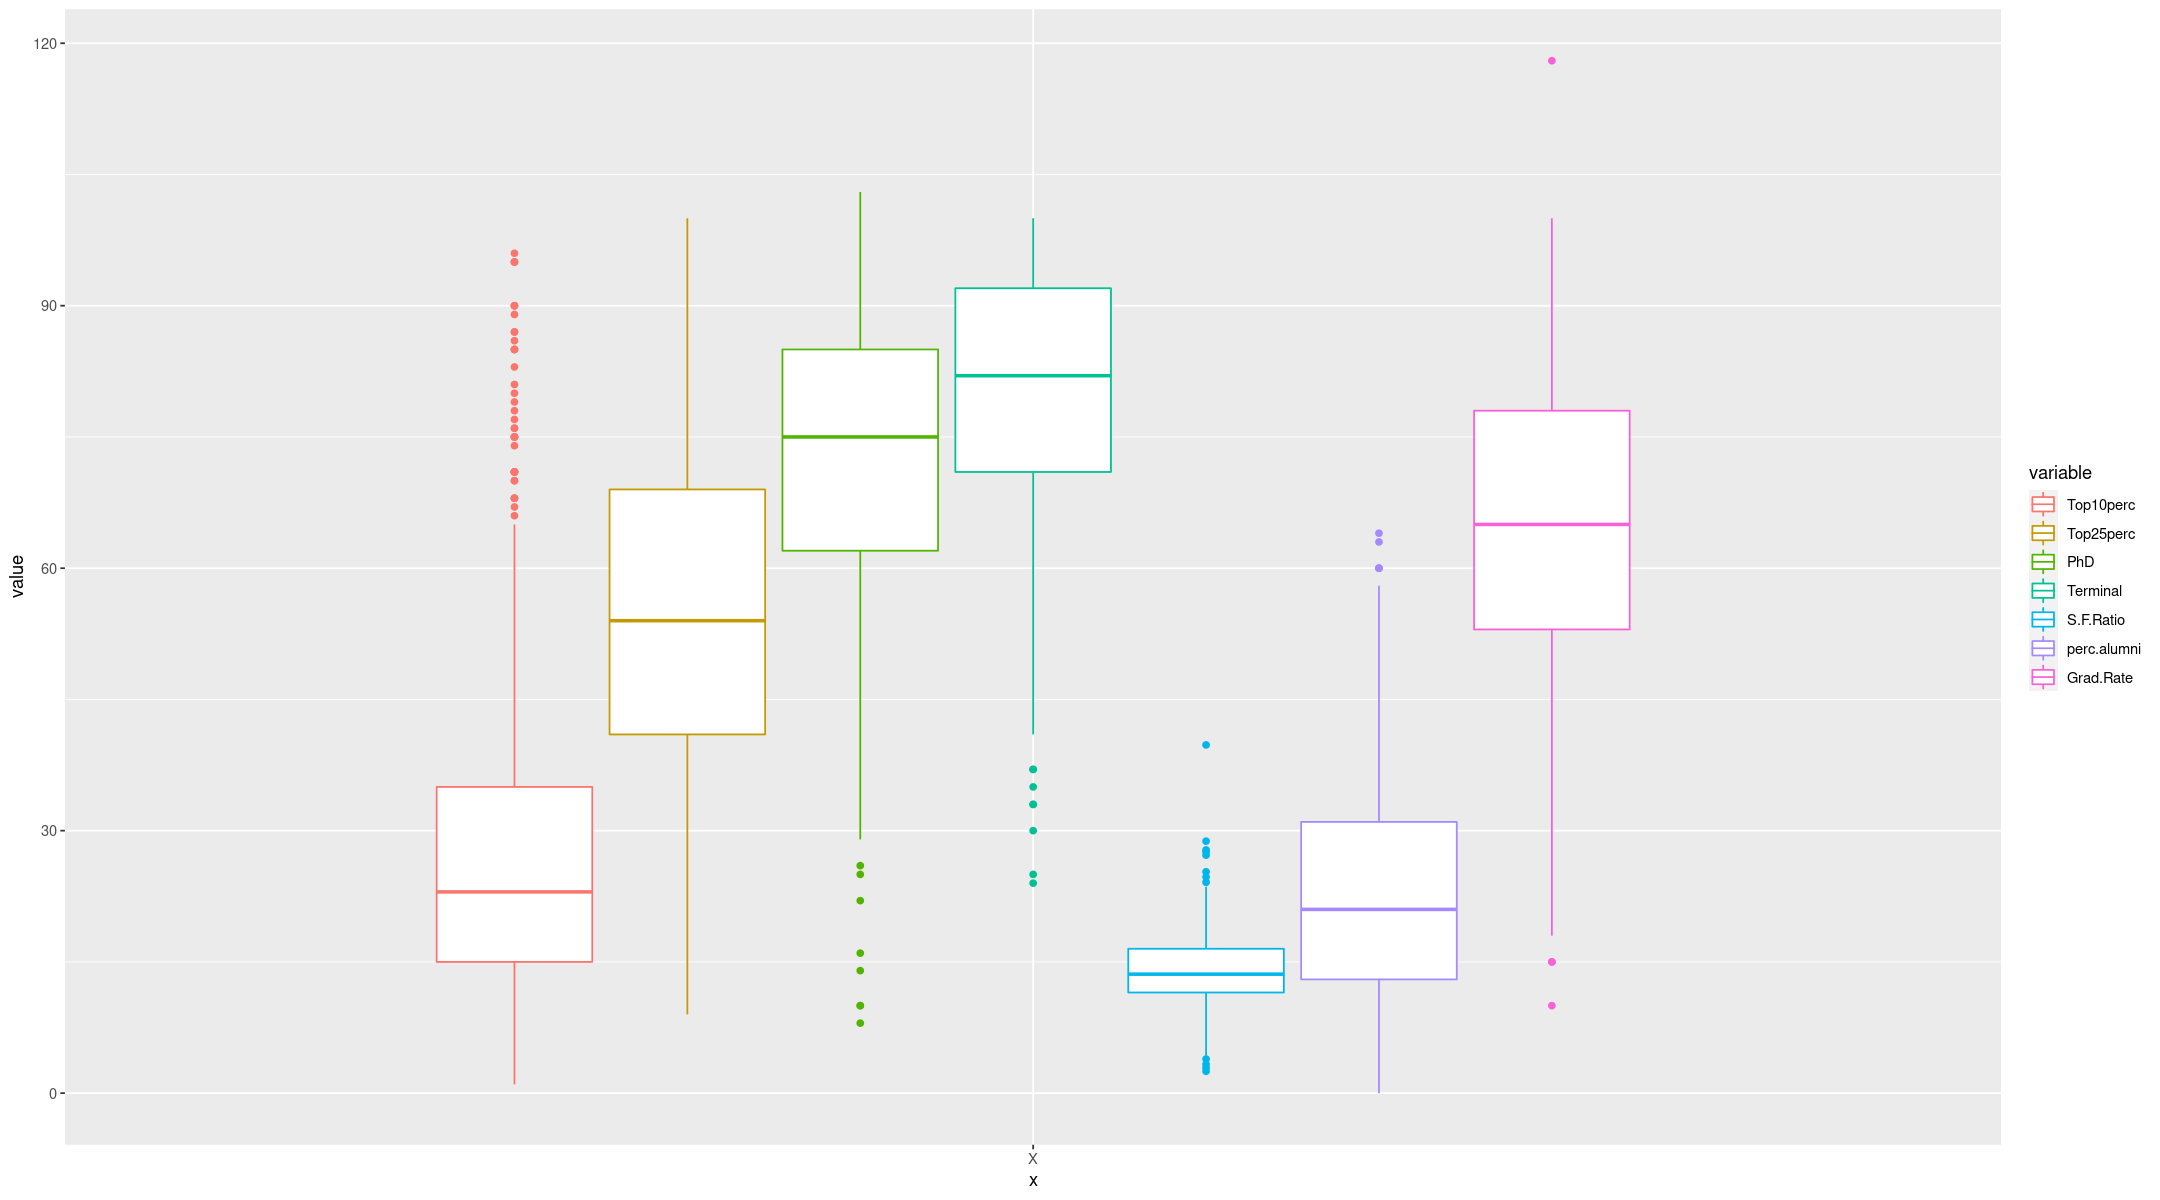

In [26]:
low_val %>%
    ggplot(aes(x="X", y=value)) +
    geom_boxplot(aes(color=variable))

In [27]:
# quantiles
sapply(d %>% select(low_val_c), quantile, na.rm = TRUE)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(low_val_c)` instead of `low_val_c` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,Top10perc,Top25perc,PhD,Terminal,S.F.Ratio,perc.alumni,Grad.Rate
0%,1,9,8,24,2.5,0,10
25%,15,41,62,71,11.5,13,53
50%,23,54,75,82,13.6,21,65
75%,35,69,85,92,16.5,31,78
100%,96,100,103,100,39.8,64,118


For the low value variables we can notice a few things:

- Top10perc

In our boxplot we can see that the median for this variable is 23, the maximum is 96 and the minimum is 1 with the 25% and 75% percentiles sitting at 15 and 35 respectively.

The range for this variable is of 95 and the IQR (interquartile range) is equal to 20.


- Top25perc

In our boxplot we can see that the median for this variable is 54, the maximum is 100 and the minimum is 9 with the 25% and 75% percentiles sitting at 41 and 69 respectively.

The range for this variable is of 91 and the IQR is equal to 28

- PhD

In our boxplot we can see that the median for this variable is 75, the maximum is 103 and the minimum is 8 with the 25% and 75% percentiles sitting at 62 and 85 respectively.

The range for this variable is of 95 and the IQR is equal to 23

- Terminal

In our boxplot we can see that the median for this variable is 82, the maximum is 100 and the minimum is 24 with the 25% and 75% percentiles sitting at 71 and 92 respectively.

The range for this variable is of 76 and the IQR is equal to 21

- S.F.Ratio

In our boxplot we can see that the median for this variable is 13.6, the maximum is 39.8 and the minimum is 2.5 with the 25% and 75% percentiles sitting at 11.5 and 16.5 respectively.

The range for this variable is of 37.3 and the IQR is equal to 5

- perc.alumni

In our boxplot we can see that the median for this variable is 21, the maximum is 64 and the minimum is 0 with the 25% and 75% percentiles sitting at 13 and 31 respectively.

The range for this variable is of 64 and the IQR is equal to 18

- Grad.Rate

In our boxplot we can see that the median for this variable is 65, the maximum is 118 and the minimum is 10 with the 25% and 75% percentiles sitting at 53 and 78 respectively.

The range for this variable is of 108 and the IQR is equal to 25


#### Variables with medium values (maximum less than or equal to 8124 and not in low values list)

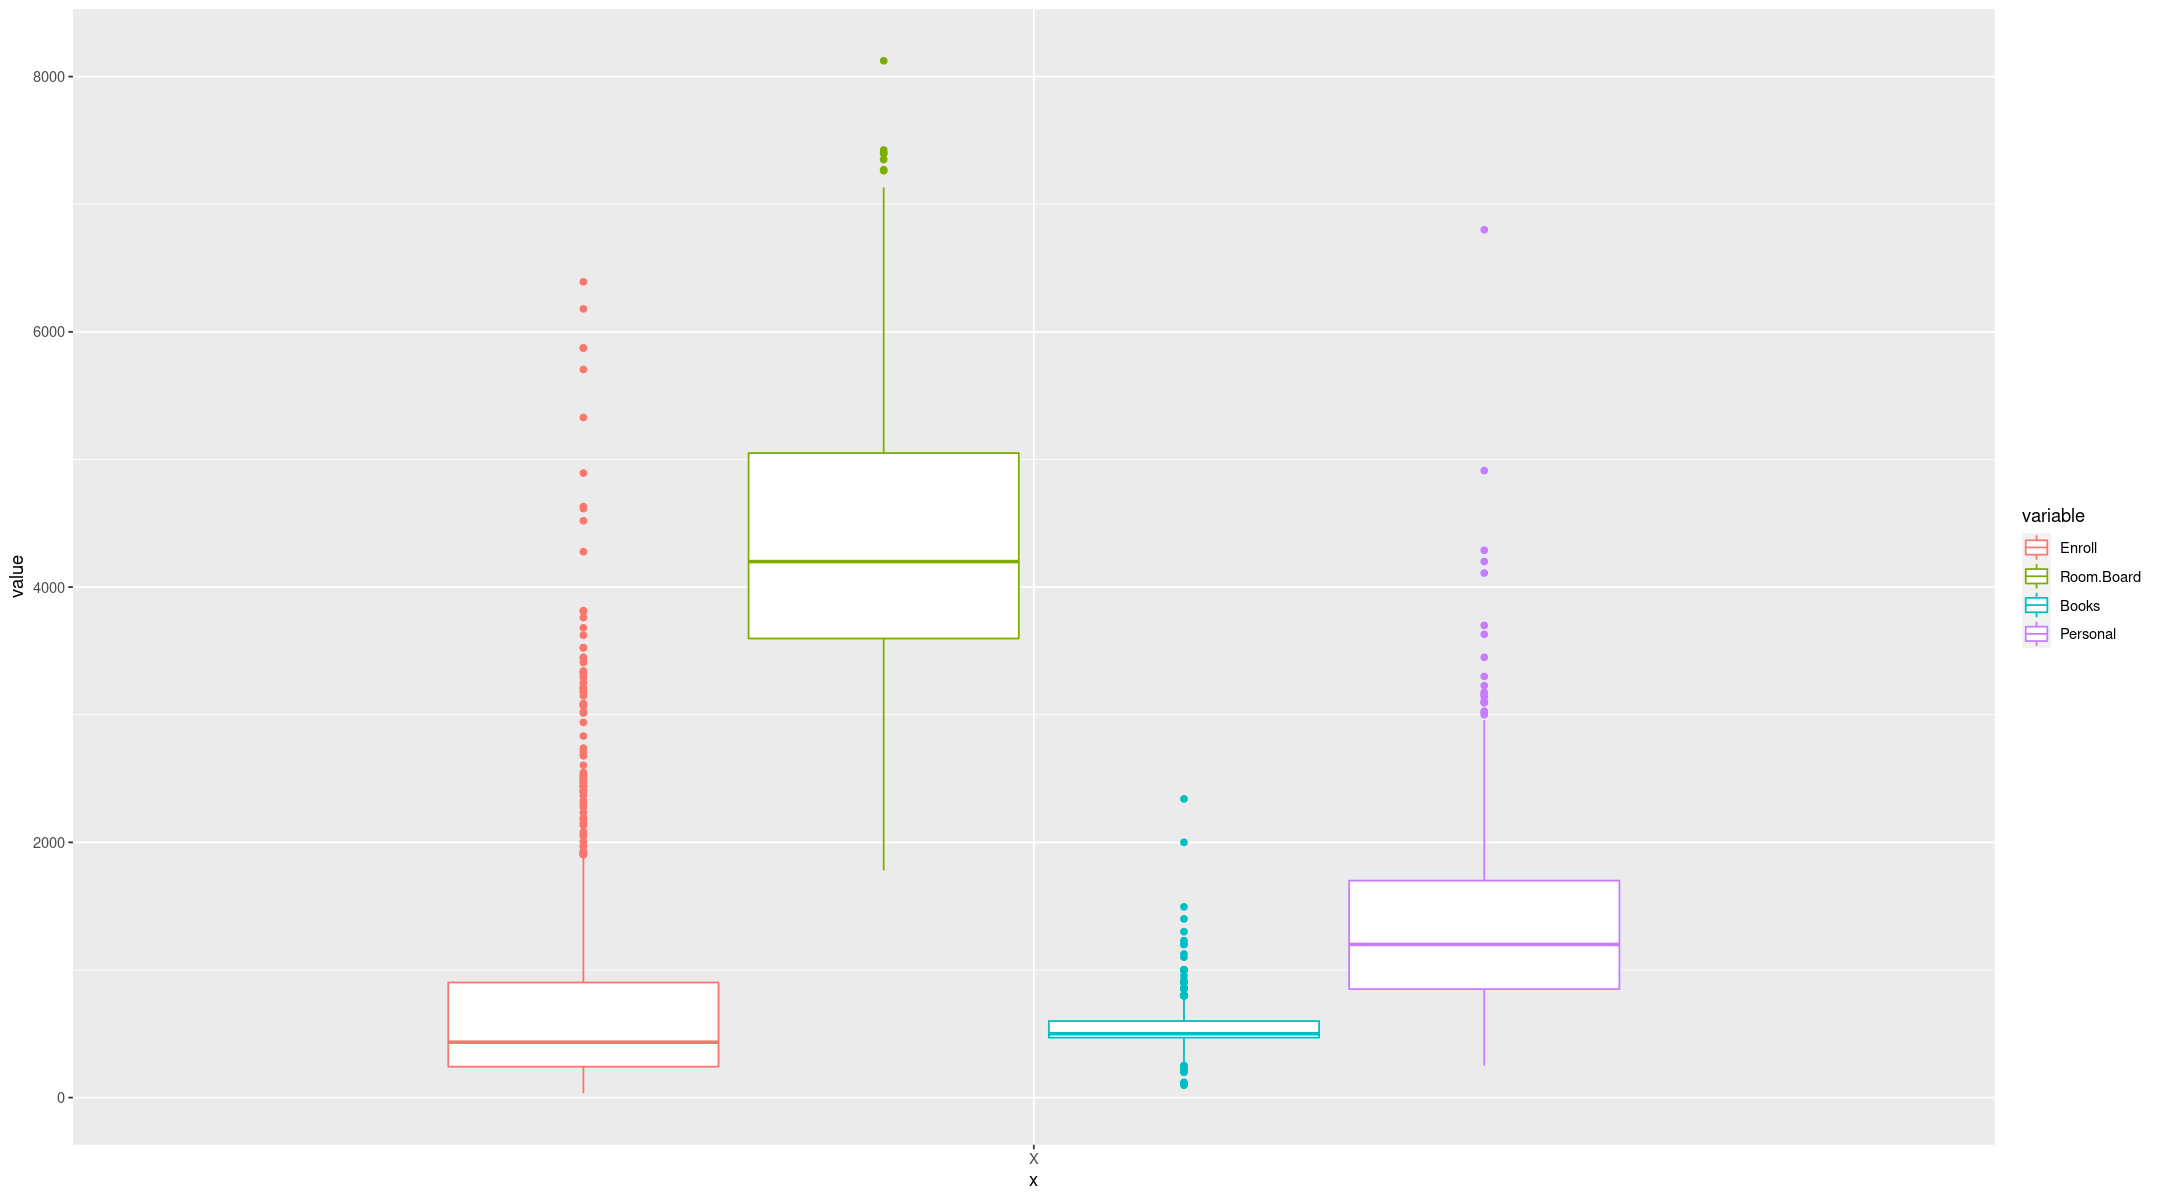

In [28]:
med_val %>%
    ggplot(aes(x="X", y=value)) +
    geom_boxplot(aes(color=variable))

In [29]:
# quantiles
sapply(d %>% select(med_val_c), quantile, na.rm = TRUE)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(med_val_c)` instead of `med_val_c` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,Enroll,Room.Board,Books,Personal
0%,35,1780,96,250
25%,242,3597,470,850
50%,434,4200,500,1200
75%,902,5050,600,1700
100%,6392,8124,2340,6800


For the medium value variables we can notice a few things:

- Enroll

In our boxplot we can see that the median for this variable is 494, the maximum is 6392 and the minimum is 35 with the 25% and 75% percentiles sitting at 242 and 902 respectively.

The range for this variable is of 6357 and the IQR (interquartile range) is equal to 660.


- Room.Board

In our boxplot we can see that the median for this variable is 4200, the maximum is 8124 and the minimum is 1780 with the 25% and 75% percentiles sitting at 3597 and 5050 respectively.

The range for this variable is of 6344 and the IQR is equal to 1453.

- Books

In our boxplot we can see that the median for this variable is 500, the maximum is 2340 and the minimum is 96 with the 25% and 75% percentiles sitting at 470 and 600 respectively.

The range for this variable is of 2244 and the IQR is equal to 130

- Personal

In our boxplot we can see that the median for this variable is 1200, the maximum is 6800 and the minimum is 250 with the 25% and 75% percentiles sitting at 850 and 1700 respectively.

The range for this variable is of 6550 and the IQR is equal to 850


#### Variables with high values (maximums above 8124)

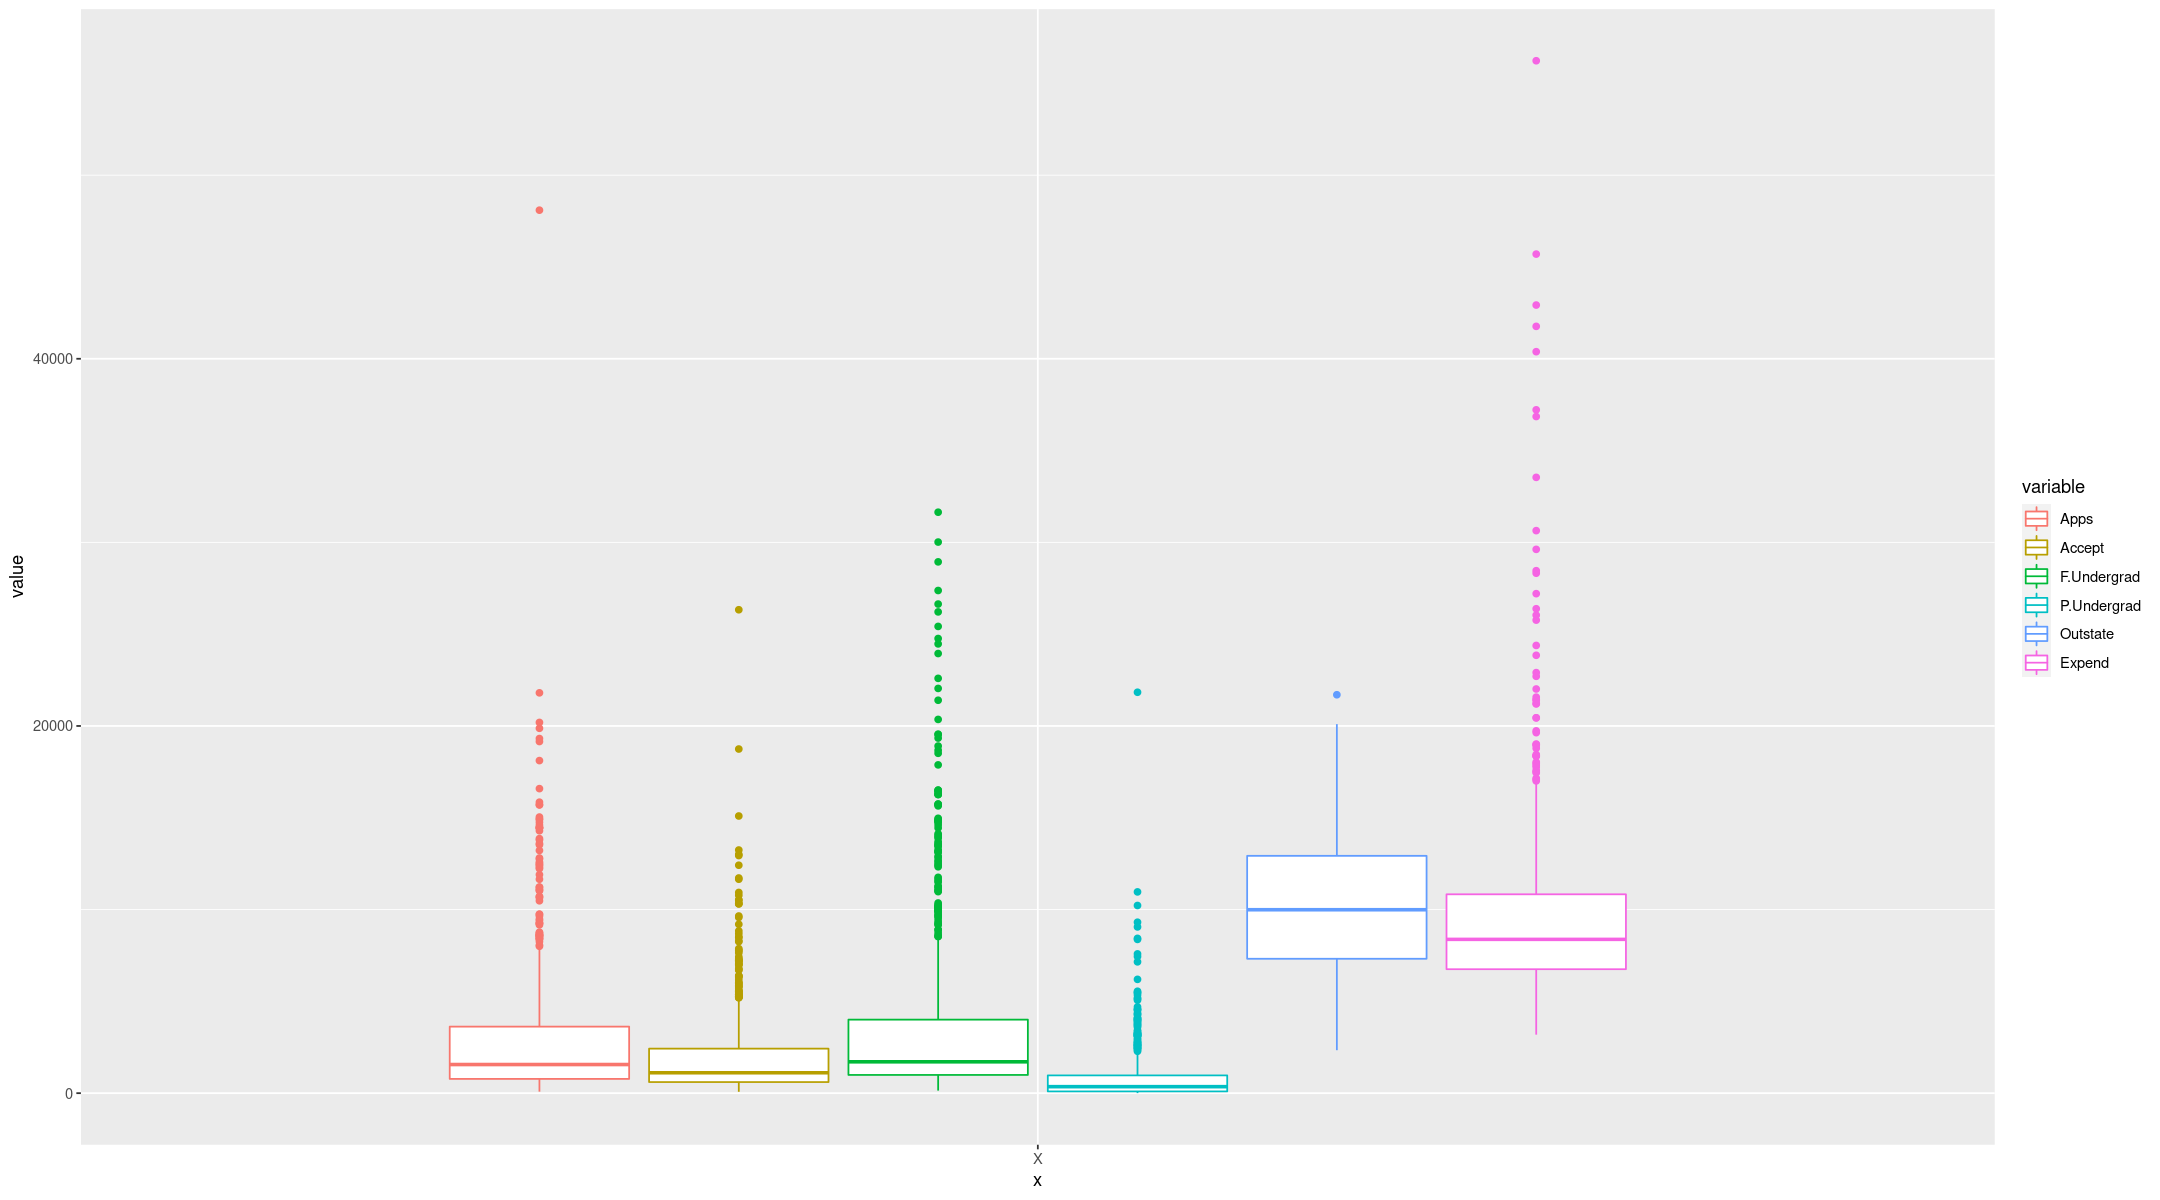

In [30]:
high_val %>%
    ggplot(aes(x="X", y=value)) +
    geom_boxplot(aes(color=variable))

In [31]:
# quantiles
sapply(d %>% select(high_val_c), quantile, na.rm = TRUE)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(high_val_c)` instead of `high_val_c` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Expend
0%,81,72,139,1,2340,3186
25%,776,604,992,95,7320,6751
50%,1558,1110,1707,353,9990,8377
75%,3624,2424,4005,967,12925,10830
100%,48094,26330,31643,21836,21700,56233


For the high value variables we can notice a few things:

- Apps

In our boxplot we can see that the median for this variable is 1558, the maximum is 48094 and the minimum is 81 with the 25% and 75% percentiles sitting at 776 and 3624 respectively.

The range for this variable is of 48013 and the IQR (interquartile range) is equal to 2848.


- Accept

In our boxplot we can see that the median for this variable is 1110, the maximum is 26330 and the minimum is 72 with the 25% and 75% percentiles sitting at 604 and 2424 respectively.

The range for this variable is of 26258 and the IQR is equal to 1820.

- F.Undergrad

In our boxplot we can see that the median for this variable is 1707, the maximum is 31643 and the minimum is 139 with the 25% and 75% percentiles sitting at 992 and 4005 respectively.

The range for this variable is of 31504 and the IQR is equal to 3013

- P.Undergrad

In our boxplot we can see that the median for this variable is 353, the maximum is 21836 and the minimum is 1 with the 25% and 75% percentiles sitting at 95 and 967 respectively.

The range for this variable is of 21835 and the IQR is equal to 872

- Outstate

In our boxplot we can see that the median for this variable is 9990, the maximum is 21700 and the minimum is 2340 with the 25% and 75% percentiles sitting at 7320 and 12925 respectively.

The range for this variable is of 19360 and the IQR is equal to 5605

- Expend

In our boxplot we can see that the median for this variable is 8377, the maximum is 56233 and the minimum is 3186 with the 25% and 75% percentiles sitting at 6751 and 10830 respectively.

The range for this variable is of 53047 and the IQR is equal to 4079


## 3- Perform a visual analysis of all quantitative variables together.  Then, Perform a visual analysis of each of the quantitative variables taking into account the variable Private.

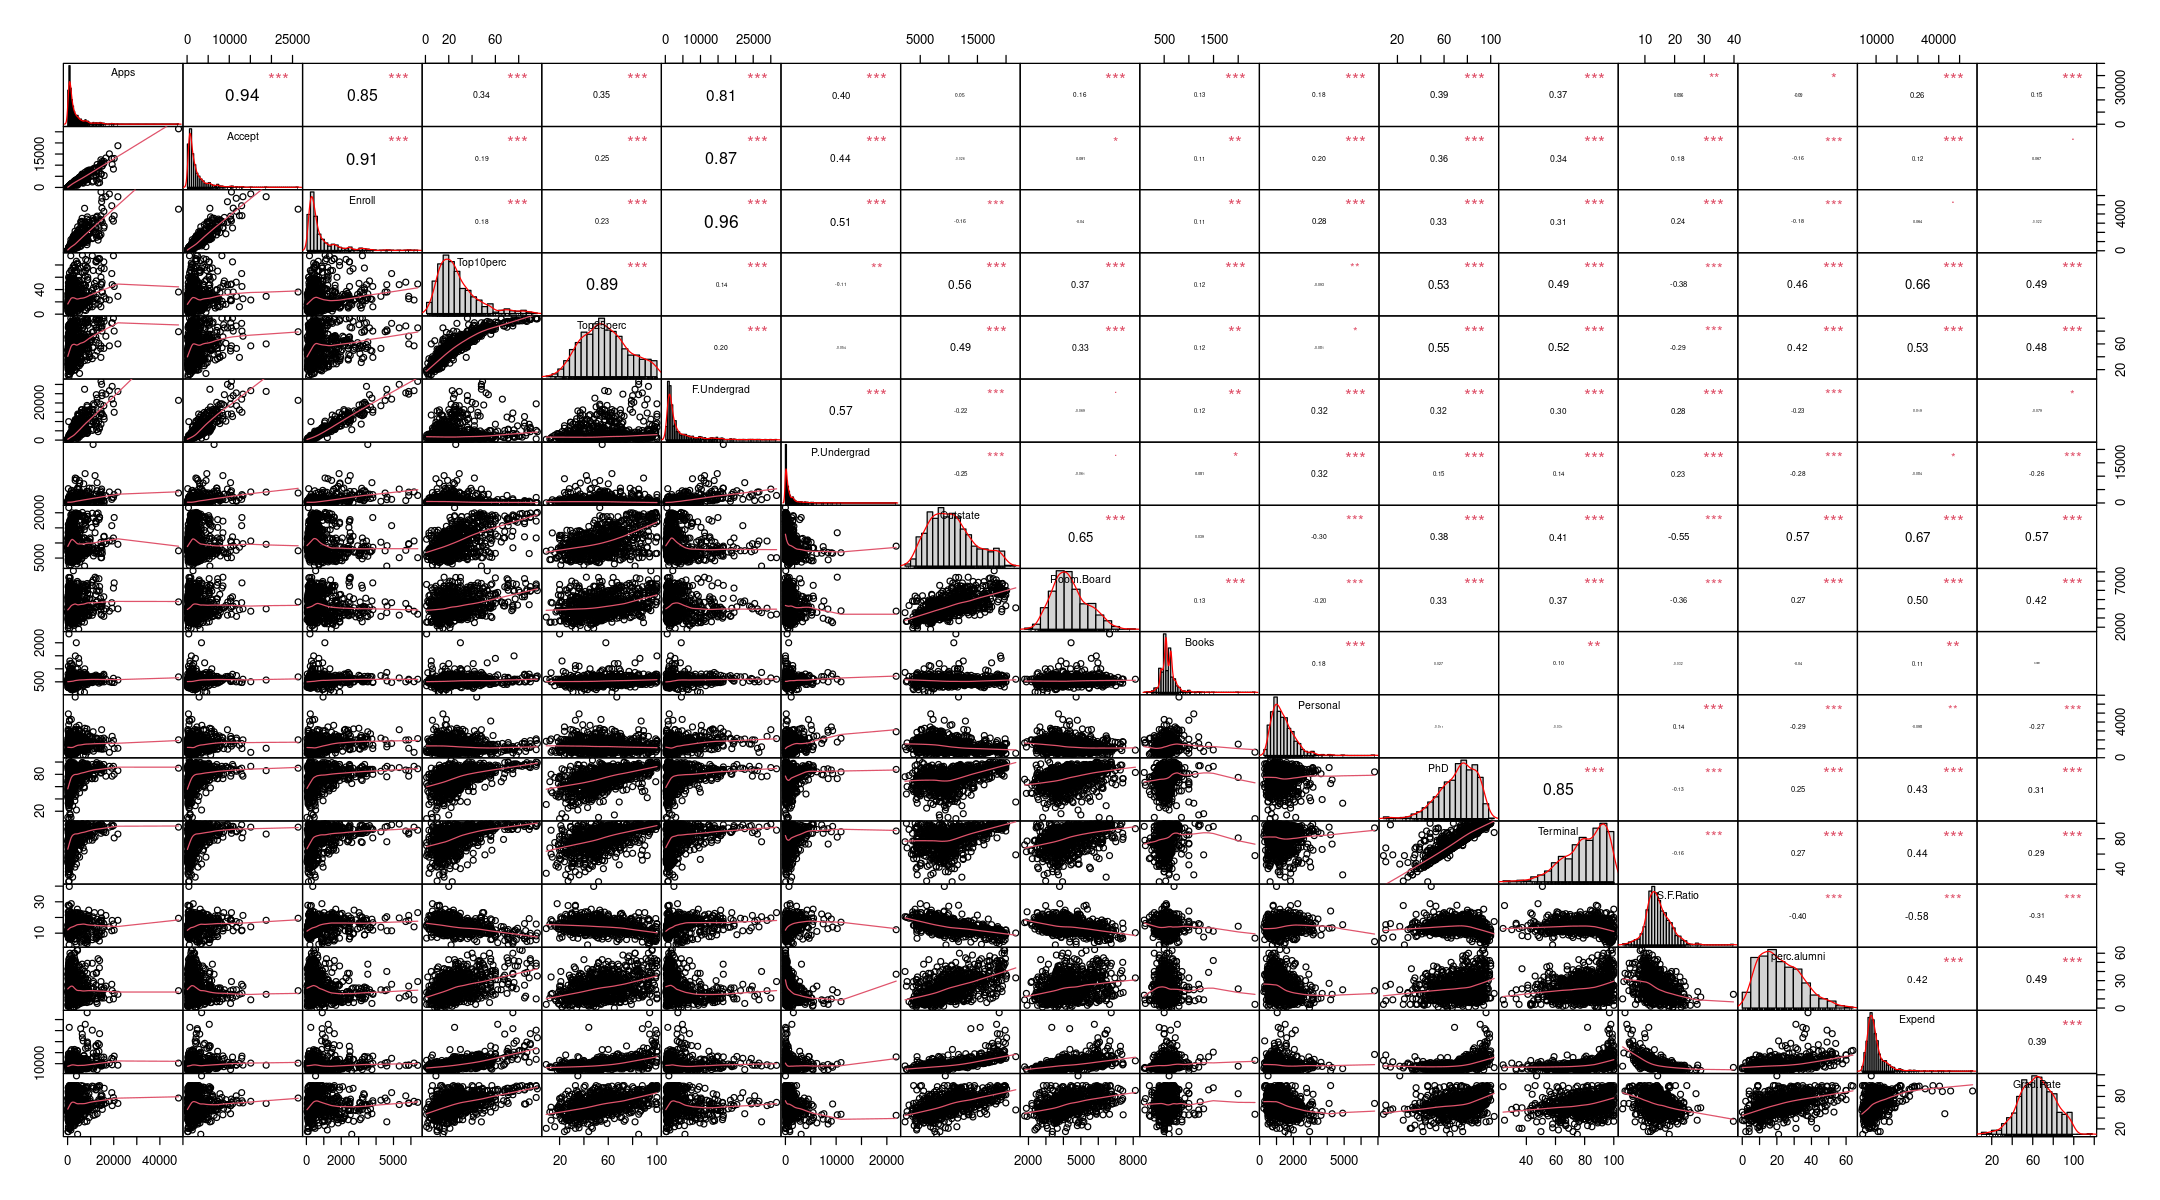

In [32]:
pa <- d %>% select(cols)
chart.Correlation(pa, histogram=TRUE, pch=19, method="pearson")

Here we can see a plot with all the numerical variables, a histogram and density plot in the main diagonal. To the bottom of the diagonal we see scatterplots for each pair of variables and a line that goes through the scatterplot. 
Above the main diagonal we see all the correlation coefficients for each pair of variables.

We see there are some highly correlated variables and some others which have negligible correlation.

All correlation coefficients are Pearson correlation coefficients.

The variables with the highest correlation are the following:

- F.Undergrad vs Enroll with very high correlation of 0.96
- Apps vs Accept with a similarly high correlation coefficient of 0.94
- Accept vs Enroll also have a very high correlation of 0.91
- 